## CAPSTONE PROJECT - CLASSIFICATION

**Nama Peserta: RAHMAT ZAKI MUHAROM**

#### IMPORT PACKAGES

In [99]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [100]:
# Import Package
import os
import pandas as pd
import numpy as np

# Package untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Package untuk cleaning, modelling, dan evaluation model
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [101]:
# menentukan path data yang akan digunakan
path = '/content/gdrive/MyDrive/RMDS_Narasio_Data/Intermediate/Meet 5/2. Classification - NPL Credit Scoring/'

In [102]:
# mengecek isi path
os.listdir(path)

['npl_credit_scoring_train.csv',
 'npl_credit_scoring_test.csv',
 'Predict_New_Data_Kartu_Kredit_Macet_Machine_Learning_Classification.csv']

In [103]:
# membuat variabel yang berisikan data train
dtrain = pd.read_csv(path + 'npl_credit_scoring_train.csv')

In [104]:
# membuat variabel yang berisikan data test
dtes = pd.read_csv(path + 'npl_credit_scoring_test.csv')

#### READ DATASET

In [105]:
# load data dtrain sebagai data utama untuk membuat model machine learning
dtrain

,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
0,92,5,5972272,6000000.0,5068230.0,0.0,0.0,5206434.0,NaN,12.19,0.00,7.84,43.92,0,0,9.916667,0.0,1041286.8,0.867739,0.000000,0.059401,0.041536,0.919164,0.919635
1,316,2,136453,65000000.0,128750.0,0.0,0.0,0.0,NaN,100.00,0.00,74.92,100.36,0,0,3.500000,0.0,0.0,0.000000,0.000000,0.023722,0.013271,0.022847,0.007724
2,624,1,1354080,3000000.0,1369203.0,0.0,15000.0,0.0,NaN,100.00,0.00,82.01,0.00,3,0,8.500000,15000.0,0.0,0.000000,0.005000,0.145833,0.000000,0.627426,0.899309
3,628,2,1076660,49000000.0,752108.0,0.0,775440.0,0.0,NaN,99.07,0.00,29.72,57.32,0,0,4.333333,775440.0,0.0,0.000000,0.015825,0.017617,0.177094,0.013699,0.255363
4,947,3,42281368,34000000.0,43130581.0,0.0,0.0,41144841.0,NaN,0.00,22.63,37.49,43.58,0,1,7.000000,0.0,13714947.0,1.210142,0.000000,0.412361,0.014556,1.205087,1.116092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15338,4443,2,11570320,15000000.0,2756602.0,0.0,8696313.0,4036479.0,A,84.50,0.00,81.30,61.90,0,0,5.330000,8696313.0,2018240.0,0.269000,0.580000,0.290000,0.269000,0.336000,0.330000
15339,6572,3,12931913,11000000.0,11797694.0,0.0,9500.0,12266233.0,F,0.00,18.10,21.90,33.10,0,0,8.670000,9500.0,4088744.0,1.120000,0.000864,0.141000,0.089200,1.080000,0.795000
15340,8813,2,4743642,7000000.0,5669470.0,0.0,279498.0,4546997.0,A,8.00,0.00,9.56,16.80,0,0,9.250000,279498.0,2273499.0,0.650000,0.039900,0.045400,0.044300,0.723000,0.637000
15341,446,2,2545407,3000000.0,2475793.0,0.0,0.0,2497853.0,B,23.04,0.00,7.60,9.47,0,0,1.666667,0.0,1248926.5,0.832618,0.000000,0.020833,0.061111,0.909339,0.965757


>Diberikan data dari sebuah bank yang berisikan data terkait kredit dari nasabah debitur.
Sebagai seorang data scientist / analyst, kita diminta untuk menilai mana nasabah debitur yang memiliki nilai kredit layak / bagus dan mana nasabah yang memiliki nilai kredit macet berdasarkan riwayat nasabah. Karena tiap harinya data yang terkumpul terus bertambah maka bank ini ingin membuat sistem penilaian kelayakan kredit secara otomatis berdasarkan data yang mereka miliki. Data yang diberikan yakni sebagai berikut.
- X : ID pelanggan
- jumlah_kartu : Jumlah kartu aktif yang dimiliki pelanggan
- outstanding : Total saldo pemakaian kartu kredit
- limit_kredit : Jumlah maks. limit kredit yang dapat digunakan
- tagihan : Jumlah tagihan pada bulan terakhir
- total_pemakaian_tunai : Total pemakaian transaksi tunai pada bulan terakhir
- total_pemakaian_retail : Total pemakaian transaksi retail pada bulan terakhir 
- sisa_tagihan_tidak_terbayar : Jumlah tagihan tidak terbayar pada bulan terakhir
- kode_cabang : kode unik tiap cabang dari bank
- rasio_pembayaran : Rasio perbandingan jumlah yang dibayar dengan tagihan pada bulan terakhir 
- persentasi_overlimit :Persentase overlimit
- rasio_pembayaran_3bulan : Rata-rata rasio pembayaran 3 bulan terakhir
- rasio_pembayaran_6bulan : Rata-rata rasio pembayaran 3 bulan sebelum 3 bulan terakhir
- skor_delikuensi : Nilai kelayakan debitur saat mengajukan pinjaman / kredit
- flag_kredit_macet : Flag yang menandakan apakah kartu kredit macet atau tidak
- jumlah_tahun_sejak_pembukaan_kredit : Jumlah kredit sejak pembuatan kartu kredit pertama kali
- total_pemakaian : Total pemakaian kartu kredit (tunai & retail) pada bulan terakhir
- sisa_tagihan_per_jumlah_kartu : Jumlah tagihan yang tak terbayar pada bulan terakhir dibagi jumlah kartu aktif
- sisa_tagihan_per_limit : Jumlah tagihan yang tak terbayar pada bulan terakhir dibagi total limit
- total_pemakaian_per_limit : Total pemakaian kartu kredit (tunai & retail) pada bulan terakhir dibagi total limit
- pemakaian_3bln_per_limit : Rata-rata pemakaian selama 3 bulan terakhir dibagi total limit
- pemakaian_6bln_per_limit : Rata-rata pemakaian selama 3 bulan sebelum 3 bulan terakhir dibagi total limit
- utilisasi_3bulan : Utilisasi kartu kredit selama 3 bulan terakhir
- utilisasi_6bulan : Utilisasi kartu kredit selama 3 bulan sebelum 3 bulan terakhir
>
>
> Dengan variabel dependen / y adalah variabel flag_kredit_macet & untuk variabel independen / X adalah seluruh variabel selain variabel dependen / y.

#### PROBLEM STATEMENT

1. Apakah nasabah dengan status kredit macet lebih banyak dibandingkan dengan yang tidak? Atau sebaliknya?
2. Bagaimana pengaruh jumlah kartu terhadap total pemakaian tunai nasabah?
3. Seberapa besar proporsi nasabah yang tidak memiliki total pemakaian tunai & total pemakaian retail?
4. Apakah status kredit macet dipengaruhi oleh persentase overlimit nasabah?
5. Apakah skor delikuensi mempengaruhi status kredit macet seorang nasabah?
6. Bagaimanakah pengaruh distribusi sisa tagihan tidak terbayar pada flag kredit macet nasabah?
7. Apakah flag kredit macet dipengaruhi oleh distribusi sisa tagihan per jumlah kartu dari nasabah?
8. Bagaimanakah pengaruh distribusi sisa tagihan per limit pada flag kredit macet nasabah?

#### EDA

In [106]:
# mengecek info dari data
dtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15343 entries, 0 to 15342
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   X                                    15343 non-null  int64  
 1   jumlah_kartu                         15343 non-null  int64  
 2   outstanding                          15343 non-null  int64  
 3   limit_kredit                         15343 non-null  float64
 4   tagihan                              15343 non-null  float64
 5   total_pemakaian_tunai                15343 non-null  float64
 6   total_pemakaian_retail               15343 non-null  float64
 7   sisa_tagihan_tidak_terbayar          15343 non-null  float64
 8   kode_cabang                          15243 non-null  object 
 9   rasio_pembayaran                     15343 non-null  float64
 10  persentasi_overlimit                 15343 non-null  float64
 11  rasio_pembayaran_3bulan     

**1. Pertama-tama akan dicari tahu, apakah nasabah / debitur dengan status kredit macet lebih banyak dibandingkan dengan yang tidak? Atau sebaliknya?**

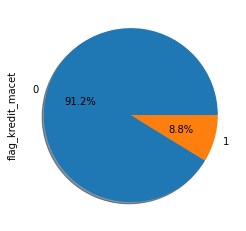

In [107]:
# Mencari perbandingan banyak/tidaknya nasabah dengan status kredit macet
dtrain['flag_kredit_macet'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

>Berdasarkan hasil temuan di atas dapat diketahui bahwa ternyata debitur dengan status kredit macet lebih sedikit dibandingkan dengan yang tidak macet.

In [108]:
# melihat summary data
dtrain.describe()

,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
count,15343.000000,15343.000000,1.534300e+04,1.534300e+04,1.534300e+04,1.534300e+04,1.534300e+04,1.534300e+04,15343.000000,15343.000000,15343.000000,15343.000000,15343.000000,15343.000000,15343.000000,1.534300e+04,1.534300e+04,15343.000000,15343.000000,15343.000000,15343.000000,15343.000000,15343.000000
mean,7750.138956,2.507332,1.160634e+07,2.081037e+07,8.087595e+06,7.468477e+04,2.032315e+06,8.138304e+06,64.482234,3.347169,50.539467,81.291786,0.004758,0.087597,6.636067,2.107030e+06,2.964641e+06,0.468332,0.109579,0.167506,0.202896,0.571362,0.534084
std,4472.966163,1.014525,2.415412e+07,2.960443e+07,1.766835e+07,6.205923e+05,7.959575e+06,1.925786e+07,797.324307,9.257389,1333.723881,1472.735798,0.114362,0.282717,4.682317,8.125462e+06,6.262742e+06,0.473221,0.200651,0.192300,0.275018,0.412303,0.432826
min,1.000000,1.000000,0.000000e+00,3.000000e+06,2.004300e+04,0.000000e+00,-1.566720e+07,0.000000e+00,-18138.000000,0.000000,-57792.340000,-77056.000000,0.000000,0.000000,0.750000,-1.566720e+07,0.000000e+00,0.000000,-0.632000,-0.126000,-0.569000,0.000288,0.000000
25%,3875.500000,2.000000,1.997592e+06,5.000000e+06,8.150830e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,20.200000,21.600000,0.000000,0.000000,2.920000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.035000,0.032900,0.189000,0.155000
50%,7752.000000,2.000000,4.724856e+06,9.000000e+06,3.141692e+06,0.000000e+00,2.010420e+05,2.750772e+06,26.900000,0.000000,50.000000,65.600000,0.000000,0.000000,5.666667,2.480000e+05,1.209318e+06,0.335929,0.022100,0.108000,0.117000,0.576000,0.496000
75%,11624.500000,3.000000,1.061836e+07,2.200000e+07,7.420343e+06,0.000000e+00,1.403758e+06,7.139904e+06,100.000000,1.070000,91.335000,100.000000,0.000000,0.000000,9.330000,1.513168e+06,3.083416e+06,0.930000,0.128000,0.239424,0.285000,0.917000,0.864000
max,15493.000000,16.000000,7.980586e+08,1.000000e+09,6.280000e+08,2.884057e+07,2.850000e+08,4.440000e+08,68983.000000,190.000000,75575.000000,54899.000000,5.000000,1.000000,34.416667,3.140000e+08,1.480000e+08,7.240000,4.600000,3.490000,8.110000,8.125671,9.730000


**2. Dapat dilihat bahwa pada total_pemakaian_tunai didapat minimum adalah 0 dan 0 juga di Q1, Q2, & Q3. Akan dilihat apakah jumlah kartu yang dimiliki nasabah berpengaruh terhadap total pemakaian tunai?**

In [109]:
# Buat Crosstab antara jumlah kartu dan total pemakaian tunai == 0; melihat proporsi nasabah yang tidak memiliki total_pemakaian_tunai berdasarkan banyaknya kartu yang dimiliki
banding1 = pd.crosstab(dtrain['jumlah_kartu'], (dtrain['total_pemakaian_tunai']==0))

In [110]:
banding1

total_pemakaian_tunai,False,True
jumlah_kartu,,
1,0,76
2,499,10127
3,133,2636
4,52,1073
5,21,435
6,12,138
7,2,73
8,1,26
9,4,12


In [111]:
# melihat jumlah nasabah yang tidak memiliki total pemakaian tunai berdasarkan jumlah kartu kredit yang dimiliki
banding1.sum()

total_pemakaian_tunai
False      725
True     14618
dtype: int64

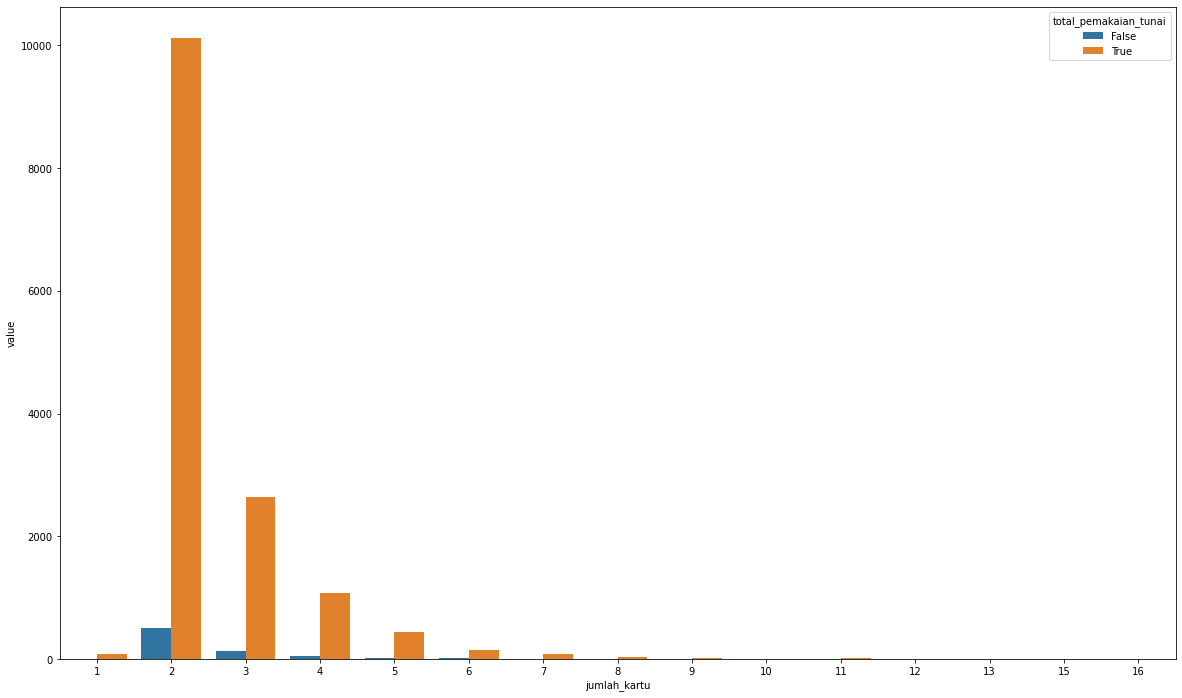

In [112]:
# membuat barplot untuk melihat proporsi nasabah yang tidak melakukan pemakaian tunai berdasarkan jumlah kartu kredit yang dimiliki
plt.figure(figsize=(20,12))
banding1_stacked = banding1.stack().reset_index().rename(columns={0: 'value'})
sns.barplot(x=banding1_stacked.jumlah_kartu, y=banding1_stacked.value, hue=banding1_stacked.total_pemakaian_tunai)
plt.show()

> Ternyata jumlah nasabah yang tidak memiliki total pemakaian tunai lebih banyak dibandingkan yang memiliki berdasarkan jumlah kartu kredit yang dimiliki nasabah. Dapat dilihat juga bahwa semakin sedikit jumlah kartu yang dimiliki nasabah, maka semakin banyak pula nasabah yang tidak memiliki total pemakaian tunai dan begitu sebaliknya.

**3. Seberapa besar proporsi nasabah yang tidak memiliki total pemakaian tunai & total pemakaian retail?**

In [113]:
# membuat variabel yang membandingkan & melihat proporsi nasabah yang tidak memiliki total pemakaian tunai & total pemakaian retail
banding_pemakaian = pd.crosstab((dtrain['total_pemakaian_tunai']==0), (dtrain['total_pemakaian_retail']==0))

In [114]:
banding_pemakaian

total_pemakaian_retail,False,True
total_pemakaian_tunai,,
False,519,206
True,9681,4937


In [115]:
# melihat jumlah nasabah yang tidak memiliki total pemakaian tunai & total pemakaian retail
banding_pemakaian.sum()

total_pemakaian_retail
False    10200
True      5143
dtype: int64

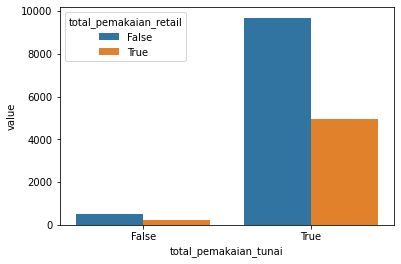

In [116]:
# membuat barplot untuk melihat proporsi nasabah yang tidak memiliki total pemakaian tunai & total pemakaian retail
banding_pemakaian_stacked = banding_pemakaian.stack().reset_index().rename(columns={0: 'value'})
sns.barplot(x=banding_pemakaian_stacked.total_pemakaian_tunai, y=banding_pemakaian_stacked.value, hue=banding_pemakaian_stacked.total_pemakaian_retail)
plt.show()

> Berdasarkan temuan di atas dapat diketahui bahwa terdapat nasabah yang tidak memiliki total pemakaian tunai & total pemakaian retail yakni sejumlah 5143 nasabah. Meskipun begitu proporsi nasabah yang memiliki total pemakaian tunai & total pemakaian retail lebih besar dibandingkan yang tidak, yakni sejumlah 10200 nasabah.

**4. Lalu, akan dicari tahu, apakah flag kredit macet dipengaruhi oleh persentase overlimit debitur?**

In [117]:
# melihat summary dari persentase overlimit
dtrain['persentasi_overlimit'].describe()

count    15343.000000
mean         3.347169
std          9.257389
min          0.000000
25%          0.000000
50%          0.000000
75%          1.070000
max        190.000000
Name: persentasi_overlimit, dtype: float64

In [118]:
# membuat & membagi bin untuk tiap nilai rendah, sedang, & tinggi dari persentase overlimit
bin = np.linspace(dtrain['persentasi_overlimit'].min(), dtrain['persentasi_overlimit'].max(), 4)
label = ['rendah', 'sedang', 'tinggi']
print(bin)

[  0.          63.33333333 126.66666667 190.        ]


In [119]:
# membuat kolom baru yang berisikan bin dari cut / pembagian nilai persentase overlimit
dtrain['bin'] = pd.cut(dtrain['persentasi_overlimit'], bins=bin, labels=label, include_lowest=True)

In [120]:
# memanggil bin & persentase overlimit
dtrain[['bin', 'persentasi_overlimit']]

,bin,persentasi_overlimit
0,rendah,0.00
1,rendah,0.00
2,rendah,0.00
3,rendah,0.00
4,rendah,22.63
...,...,...
15338,rendah,0.00
15339,rendah,18.10
15340,rendah,0.00
15341,rendah,0.00


In [121]:
# membuat crosstab untuk membandingkan flag kredit macet dengan tiap bin
banding2 = pd.crosstab(dtrain['flag_kredit_macet'], dtrain['bin'])
banding2

bin,rendah,sedang,tinggi
flag_kredit_macet,,,
0,13959,32,8
1,1323,18,3


In [122]:
# Buat hasil crosstab menjadi dataframe
banding2_stacked = banding2.stack().reset_index().rename(columns={0: 'value', 'bin': 'level_overlimit'})
banding2_stacked

,flag_kredit_macet,level_overlimit,value
0,0,rendah,13959
1,0,sedang,32
2,0,tinggi,8
3,1,rendah,1323
4,1,sedang,18
5,1,tinggi,3


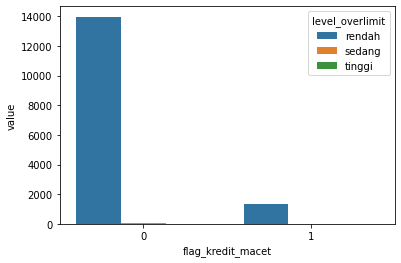

In [123]:
# membuat barplot untuk melihat proporsi flag kredit macet berdasarkan level overlimit
sns.barplot(x=banding2_stacked.flag_kredit_macet, y=banding2_stacked.value, hue=banding2_stacked.level_overlimit)
plt.show()

>Ternyata berdasarkan hasil temuan di atas, didapatkan bahwa lebih banyak persentase overlimit yang rendah cenderung tidak memiliki status kredit macet / flag kredit macet bernilai nol (0). Sedangkan, untuk flag kredit macet bernilai satu (1) juga lebih banyak didapatkan persentase overlimit yang rendah dibandingkan dengan persentase overlimit yang tinggi.
Sehingga dapat disimpulkan bahwa persentase overlimit tidak begitu mempengaruhi status kredit macet dari seorang debitur.

**5. Lalu, bagaimana dengan pegaruh skor delikuensi terhadap flag kredit macet?**

Perlu diketahui terlebih dahulu, bahwa pada skor delikuensi semakin tinggi nilainya, maka semakin beresiko untuk dipinjamkan / memiliki kredit.

In [124]:
# melihat summary skor delikuensi
dtrain['skor_delikuensi'].describe()

count    15343.000000
mean         0.004758
std          0.114362
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: skor_delikuensi, dtype: float64

In [125]:
# membuat & membagi bin untuk tiap nilai rendah, sedang, & tinggi dari skor delikuensi
bin2 = np.linspace(dtrain['skor_delikuensi'].min(), dtrain['skor_delikuensi'].max(), 4)
print(bin2)

[0.         1.66666667 3.33333333 5.        ]


In [126]:
# membuat kolom baru yang berisikan bin dari cut / pembagian nilai skor delikuensi
dtrain['bin_delikuensi'] = pd.cut(dtrain['skor_delikuensi'], bins=bin2, labels=label, include_lowest=True)

In [127]:
# memanggil bin & nilai skor delikuensi
dtrain[['bin_delikuensi', 'skor_delikuensi']]

,bin_delikuensi,skor_delikuensi
0,rendah,0
1,rendah,0
2,sedang,3
3,rendah,0
4,rendah,0
...,...,...
15338,rendah,0
15339,rendah,0
15340,rendah,0
15341,rendah,0


In [128]:
# membuat crosstab untuk membandingkan flag kredit macet dengan tiap bin skor delikuensi
banding3 = pd.crosstab(dtrain['flag_kredit_macet'], dtrain['bin_delikuensi'])
banding3

bin_delikuensi,rendah,sedang,tinggi
flag_kredit_macet,,,
0,13987,5,7
1,1343,1,0


In [129]:
# Buat hasil crosstab menjadi dataframe
banding3_stacked = banding3.stack().reset_index().rename(columns={0: 'value', 'bin_delikuensi': 'level_delikuensi'})
banding3_stacked

,flag_kredit_macet,level_delikuensi,value
0,0,rendah,13987
1,0,sedang,5
2,0,tinggi,7
3,1,rendah,1343
4,1,sedang,1
5,1,tinggi,0


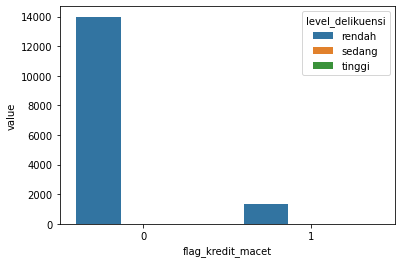

In [130]:
# membuat barplot untuk melihat proporsi flag kredit macet berdasarkan skor delikuensi
sns.barplot(x=banding3_stacked.flag_kredit_macet, y=banding3_stacked.value, hue=banding3_stacked.level_delikuensi)
plt.show()

> Dapat diketahui dari hasil di atas bahwa lebih banyak skor delikuensi yang rendah dengan status flag kredit macet bernilai nol (0). Sedangkan pada status flag kredit macet bernilai satu (1), skor delikuensi yang sedang hanya dijumpai 1 & skor delikuensi yang tinggi tidak dijumpai sama sekali. Sehingga, skor delikuensi juga tidak begitu mempengaruhi ilai flag kredit macet.

**6. Bagaimanakah pengaruh distribusi sisa tagihan tidak terbayar pada flag kredit macet?**

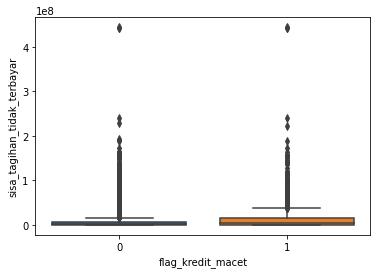

In [131]:
# membuat boxplot untuk melihat pengaruh distribusi sisa_tagihan_tidak_terbayar pada flag_kredit_macet
sns.boxplot(x="flag_kredit_macet", y="sisa_tagihan_tidak_terbayar", data=dtrain)

> Ternyata berdasarkan hasil boxplot di atas, dapat diketahui bahwa distribusi sisa tagihan tidak terbayar di kedua nilai flag kredit macet berdistribusi kurang lebih sama. Sehingga, distribusi sisa tagihan tidak terbayar tidak mempengaruhi nilai flag kredit macet.

**7. Selanjutnya, bagaimana dengan pengaruh distribusi sisa tagihan per jumlah kartu pada flag kredit macet?**

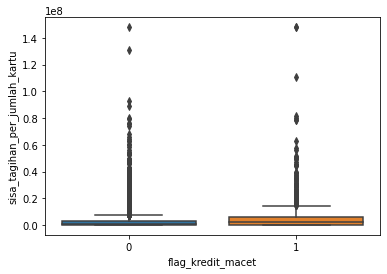

In [132]:
# membuat boxplot untuk melihat pengaruh distribusi sisa_tagihan_per_jumlah_kartu pada flag_kredit_macet
sns.boxplot(x="flag_kredit_macet", y="sisa_tagihan_per_jumlah_kartu", data=dtrain)

> Pada hasil di atas juga didapatkan bahwa distribusi sisa tagihan per jumlah kartu di kedua nilai flag kredit macet juga berdistribusi kurang lebih sama. Sehingga sisa tagihan per jumlah kartu tidak banyak berpengaruh juga terhadap nilai flag kredit macet.

**8. Lalu, bagaimanakah pengaruh distribusi sisa tagihan per limit pada flag kredit macet?**

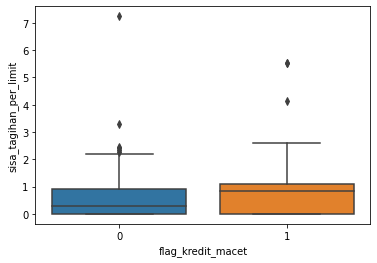

In [133]:
# membuat boxplot untuk melihat pengaruh distribusi sisa_tagihan_per_limit pada flag_kredit_macet
sns.boxplot(x="flag_kredit_macet", y="sisa_tagihan_per_limit", data=dtrain)

> Pada hasil boxplot distribusi sisa tagihan per limit pun juga demikian. Tidak menunjukkan banyaknya pengaruh terhadap nilai flag kredit macet.

#### DATA PRE-PROCESSING

**CEK DUPLIKASI DATA**

In [134]:
# mengecek duplikasi data
dtrain[dtrain.duplicated(keep=False)]

,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan,bin,bin_delikuensi


**CEK MISSING VALUE**

In [135]:
# mengecek missing value pada tiap-tiap feature
dtrain.isnull().sum()

X                                        0
jumlah_kartu                             0
outstanding                              0
limit_kredit                             0
tagihan                                  0
total_pemakaian_tunai                    0
total_pemakaian_retail                   0
sisa_tagihan_tidak_terbayar              0
kode_cabang                            100
rasio_pembayaran                         0
persentasi_overlimit                     0
rasio_pembayaran_3bulan                  0
rasio_pembayaran_6bulan                  0
skor_delikuensi                          0
flag_kredit_macet                        0
jumlah_tahun_sejak_pembukaan_kredit      0
total_pemakaian                          0
sisa_tagihan_per_jumlah_kartu            0
sisa_tagihan_per_limit                   0
total_pemakaian_per_limit                0
pemakaian_3bln_per_limit                 0
pemakaian_6bln_per_limit                 0
utilisasi_3bulan                         0
utilisasi_6

In [136]:
# mendrop nilai NaN / nul yang ada di data
dtrain = dtrain.dropna()

In [137]:
# mengecek kembali keberadaan nilai NaN / null
dtrain.isnull().sum()

X                                      0
jumlah_kartu                           0
outstanding                            0
limit_kredit                           0
tagihan                                0
total_pemakaian_tunai                  0
total_pemakaian_retail                 0
sisa_tagihan_tidak_terbayar            0
kode_cabang                            0
rasio_pembayaran                       0
persentasi_overlimit                   0
rasio_pembayaran_3bulan                0
rasio_pembayaran_6bulan                0
skor_delikuensi                        0
flag_kredit_macet                      0
jumlah_tahun_sejak_pembukaan_kredit    0
total_pemakaian                        0
sisa_tagihan_per_jumlah_kartu          0
sisa_tagihan_per_limit                 0
total_pemakaian_per_limit              0
pemakaian_3bln_per_limit               0
pemakaian_6bln_per_limit               0
utilisasi_3bulan                       0
utilisasi_6bulan                       0
bin             

**LABEL ENCODER**

In [138]:
# Mengubah data kategorikal kedalam bentuk numerik
cat = ['kode_cabang', 'bin', 'bin_delikuensi']

encoded_data = LabelEncoder()

#dtrain[['kode_cabang']] = encoded_data.fit_transform(dtrain['kode_cabang'])

for feature in cat:
        if feature in dtrain.columns.values:
            dtrain[feature] = encoded_data.fit_transform(dtrain[feature])

dtrain.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan,bin,bin_delikuensi
100,13625,2,4306728,4000000.0,4316980.0,0.0,161999.0,4290920.0,0,7.98,6.87,4.39,9.96,0,0,6.83,161999.0,2145460.0,1.0700,0.04050,0.06300,0.11900,0.95200,0.83300,0,0
101,3563,2,921499,59000000.0,563269.0,0.0,382810.0,893878.0,2,100.00,0.00,78.10,0.00,0,0,9.58,382810.0,446939.0,0.0152,0.00649,0.00747,0.02140,0.00906,0.02080,0,0
102,12481,2,2986142,10000000.0,54771.0,0.0,2783345.0,0.0,0,0.00,0.00,38.70,64.90,0,0,5.92,2783345.0,0.0,0.0000,0.27800,0.07620,0.00737,0.07810,0.00853,0,0
103,4254,2,6437645,6000000.0,5970411.0,0.0,866750.0,6424640.0,0,34.10,6.79,24.90,41.70,0,0,8.83,866750.0,3212320.0,1.0700,0.14400,0.15300,0.39300,1.13000,0.98300,0,0
104,12541,3,1370140,7000000.0,278500.0,0.0,390074.0,821072.0,5,105.00,0.00,99.80,99.50,0,0,11.80,390074.0,273691.0,0.1170,0.05570,0.27700,0.37700,0.27100,0.44600,0,0


In [139]:
# mengecek tipe data
dtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15243 entries, 100 to 15342
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   X                                    15243 non-null  int64  
 1   jumlah_kartu                         15243 non-null  int64  
 2   outstanding                          15243 non-null  int64  
 3   limit_kredit                         15243 non-null  float64
 4   tagihan                              15243 non-null  float64
 5   total_pemakaian_tunai                15243 non-null  float64
 6   total_pemakaian_retail               15243 non-null  float64
 7   sisa_tagihan_tidak_terbayar          15243 non-null  float64
 8   kode_cabang                          15243 non-null  int64  
 9   rasio_pembayaran                     15243 non-null  float64
 10  persentasi_overlimit                 15243 non-null  float64
 11  rasio_pembayaran_3bulan   

**DATA WRANGLING**

In [140]:
dtrain.describe()

,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan,bin,bin_delikuensi
count,15243.000000,15243.000000,1.524300e+04,1.524300e+04,1.524300e+04,1.524300e+04,1.524300e+04,1.524300e+04,15243.000000,15243.000000,15243.000000,15243.000000,15243.000000,15243.000000,15243.000000,15243.000000,1.524300e+04,1.524300e+04,15243.000000,15243.000000,15243.000000,15243.000000,15243.000000,15243.000000,15243.000000,15243.000000
mean,7746.216952,2.507446,1.160716e+07,2.077908e+07,8.097279e+06,7.449573e+04,2.027562e+06,8.146400e+06,2.132520,64.507861,3.355427,50.484064,81.310183,0.004592,0.087844,6.641929,2.102089e+06,2.965263e+06,0.468735,0.109667,0.167551,0.203137,0.571827,0.534449,0.004723,0.001246
std,4474.179993,1.013875,2.419846e+07,2.960812e+07,1.770636e+07,6.207148e+05,7.966212e+06,1.929042e+07,3.004418,799.924593,9.275493,1338.088142,1477.508529,0.112141,0.283077,4.690106,8.132887e+06,6.267090e+06,0.473290,0.200845,0.192419,0.275335,0.412530,0.432970,0.078389,0.046514
min,1.000000,1.000000,0.000000e+00,3.000000e+06,2.004300e+04,0.000000e+00,-1.566720e+07,0.000000e+00,0.000000,-18138.000000,0.000000,-57792.340000,-77056.000000,0.000000,0.000000,0.750000,-1.566720e+07,0.000000e+00,0.000000,-0.632000,-0.126000,-0.569000,0.000288,0.000000,0.000000,0.000000
25%,3867.500000,2.000000,2.000551e+06,5.000000e+06,8.148450e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,20.200000,21.600000,0.000000,0.000000,2.920000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.035150,0.032908,0.189000,0.155000,0.000000,0.000000
50%,7746.000000,2.000000,4.725195e+06,9.000000e+06,3.145469e+06,0.000000e+00,2.020000e+05,2.753848e+06,0.000000,26.800000,0.000000,50.000000,65.600000,0.000000,0.000000,5.666667,2.490000e+05,1.213084e+06,0.337000,0.022200,0.108000,0.117000,0.577000,0.498000,0.000000,0.000000
75%,11623.500000,3.000000,1.057580e+07,2.200000e+07,7.420343e+06,0.000000e+00,1.397323e+06,7.142066e+06,5.000000,100.000000,1.090000,91.200000,100.000000,0.000000,0.000000,9.330000,1.504334e+06,3.082346e+06,0.930000,0.128000,0.239299,0.285000,0.918000,0.864000,0.000000,0.000000
max,15493.000000,16.000000,7.980586e+08,1.000000e+09,6.280000e+08,2.884057e+07,2.850000e+08,4.440000e+08,10.000000,68983.000000,190.000000,75575.000000,54899.000000,5.000000,1.000000,34.416667,3.140000e+08,1.480000e+08,7.240000,4.600000,3.490000,8.110000,8.125671,9.730000,2.000000,2.000000


>Berdasarkan hasil temuan dari summary (describe) keseluruhan data di atas, ditemukan anomali pada beberapa variabel feature yang memiliki nilai minimum bernilai minus / negatif. Beberapat variabel feature tersebut yakni 'total_pemakaian_retail', 'rasio_pembayaran', 'rasio_pembayaran_3bulan', 'rasio_pembayaran_6bulan', 'total_pemakaian', 'total_pemakaian_per_limit', 'pemakaian_3bln_per_limit', dan 'pemakaian_6bln_per_limit'. 
>
>Berdasarkan hasil temuan ini **akan dilakukan imputasi data yang bernilai minus** berupa masing-masing nilai mean pada tiap-tiap feature yang telah disebutkan.

In [141]:
# membuat kategori yang berisikan feature yang memiliki nilai minus
kategori = ['total_pemakaian_retail', 'rasio_pembayaran', 'rasio_pembayaran_3bulan', 'rasio_pembayaran_6bulan', 'total_pemakaian', 'total_pemakaian_per_limit', 'pemakaian_3bln_per_limit', 'pemakaian_6bln_per_limit']

In [142]:
# membuat looping yang mengisi nilai minus dalam variabel kategori dengan masing-masing mean pada tiap feature
for feature in kategori:
            dtrain[feature] = dtrain[feature].apply(lambda x: dtrain[feature].mean() if x < 0 else x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [143]:
# mengecek perubahan nilai minus pada data
dtrain

,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan,bin,bin_delikuensi
100,13625,2,4306728,4000000.0,4316980.0,0.0,161999.0,4290920.0,0,7.98,6.87,4.39,9.96,0,0,6.830000,161999.0,2145460.0,1.070000,0.040500,0.063000,0.119000,0.952000,0.833000,0,0
101,3563,2,921499,59000000.0,563269.0,0.0,382810.0,893878.0,2,100.00,0.00,78.10,0.00,0,0,9.580000,382810.0,446939.0,0.015200,0.006490,0.007470,0.021400,0.009060,0.020800,0,0
102,12481,2,2986142,10000000.0,54771.0,0.0,2783345.0,0.0,0,0.00,0.00,38.70,64.90,0,0,5.920000,2783345.0,0.0,0.000000,0.278000,0.076200,0.007370,0.078100,0.008530,0,0
103,4254,2,6437645,6000000.0,5970411.0,0.0,866750.0,6424640.0,0,34.10,6.79,24.90,41.70,0,0,8.830000,866750.0,3212320.0,1.070000,0.144000,0.153000,0.393000,1.130000,0.983000,0,0
104,12541,3,1370140,7000000.0,278500.0,0.0,390074.0,821072.0,5,105.00,0.00,99.80,99.50,0,0,11.800000,390074.0,273691.0,0.117000,0.055700,0.277000,0.377000,0.271000,0.446000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15338,4443,2,11570320,15000000.0,2756602.0,0.0,8696313.0,4036479.0,0,84.50,0.00,81.30,61.90,0,0,5.330000,8696313.0,2018240.0,0.269000,0.580000,0.290000,0.269000,0.336000,0.330000,0,0
15339,6572,3,12931913,11000000.0,11797694.0,0.0,9500.0,12266233.0,5,0.00,18.10,21.90,33.10,0,0,8.670000,9500.0,4088744.0,1.120000,0.000864,0.141000,0.089200,1.080000,0.795000,0,0
15340,8813,2,4743642,7000000.0,5669470.0,0.0,279498.0,4546997.0,0,8.00,0.00,9.56,16.80,0,0,9.250000,279498.0,2273499.0,0.650000,0.039900,0.045400,0.044300,0.723000,0.637000,0,0
15341,446,2,2545407,3000000.0,2475793.0,0.0,0.0,2497853.0,1,23.04,0.00,7.60,9.47,0,0,1.666667,0.0,1248926.5,0.832618,0.000000,0.020833,0.061111,0.909339,0.965757,0,0


In [144]:
# mengecek kembali summary pada data
dtrain.describe()

,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan,bin,bin_delikuensi
count,15243.000000,15243.000000,1.524300e+04,1.524300e+04,1.524300e+04,1.524300e+04,1.524300e+04,1.524300e+04,15243.000000,15243.000000,15243.000000,15243.000000,15243.000000,15243.000000,15243.000000,15243.000000,1.524300e+04,1.524300e+04,15243.000000,15243.000000,15243.000000,15243.000000,15243.000000,15243.000000,15243.000000,15243.000000
mean,7746.216952,2.507446,1.160716e+07,2.077908e+07,8.097279e+06,7.449573e+04,2.037738e+06,8.146400e+06,2.132520,67.547946,3.355427,80.862504,100.918574,0.004592,0.087844,6.641929,2.112311e+06,2.965263e+06,0.468735,0.110225,0.167668,0.203438,0.571827,0.534449,0.004723,0.001246
std,4474.179993,1.013875,2.419846e+07,2.960812e+07,1.770636e+07,6.207148e+05,7.961983e+06,1.929042e+07,3.004418,782.900621,9.275493,802.092762,991.163091,0.112141,0.283077,4.690106,8.128677e+06,6.267090e+06,0.473290,0.200455,0.192356,0.275151,0.412530,0.432970,0.078389,0.046514
min,1.000000,1.000000,0.000000e+00,3.000000e+06,2.004300e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000288,0.000000,0.000000,0.000000
25%,3867.500000,2.000000,2.000551e+06,5.000000e+06,8.148450e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,20.800000,22.400000,0.000000,0.000000,2.920000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.035300,0.033219,0.189000,0.155000,0.000000,0.000000
50%,7746.000000,2.000000,4.725195e+06,9.000000e+06,3.145469e+06,0.000000e+00,2.080000e+05,2.753848e+06,0.000000,27.000000,0.000000,50.100000,66.300000,0.000000,0.000000,5.666667,2.550000e+05,1.213084e+06,0.337000,0.022900,0.108000,0.118000,0.577000,0.498000,0.000000,0.000000
75%,11623.500000,3.000000,1.057580e+07,2.200000e+07,7.420343e+06,0.000000e+00,1.432000e+06,7.142066e+06,5.000000,100.000000,1.090000,91.200000,100.000000,0.000000,0.000000,9.330000,1.533900e+06,3.082346e+06,0.930000,0.128000,0.239299,0.285000,0.918000,0.864000,0.000000,0.000000
max,15493.000000,16.000000,7.980586e+08,1.000000e+09,6.280000e+08,2.884057e+07,2.850000e+08,4.440000e+08,10.000000,68983.000000,190.000000,75575.000000,54899.000000,5.000000,1.000000,34.416667,3.140000e+08,1.480000e+08,7.240000,4.600000,3.490000,8.110000,8.125671,9.730000,2.000000,2.000000


**CEK KORELASI**

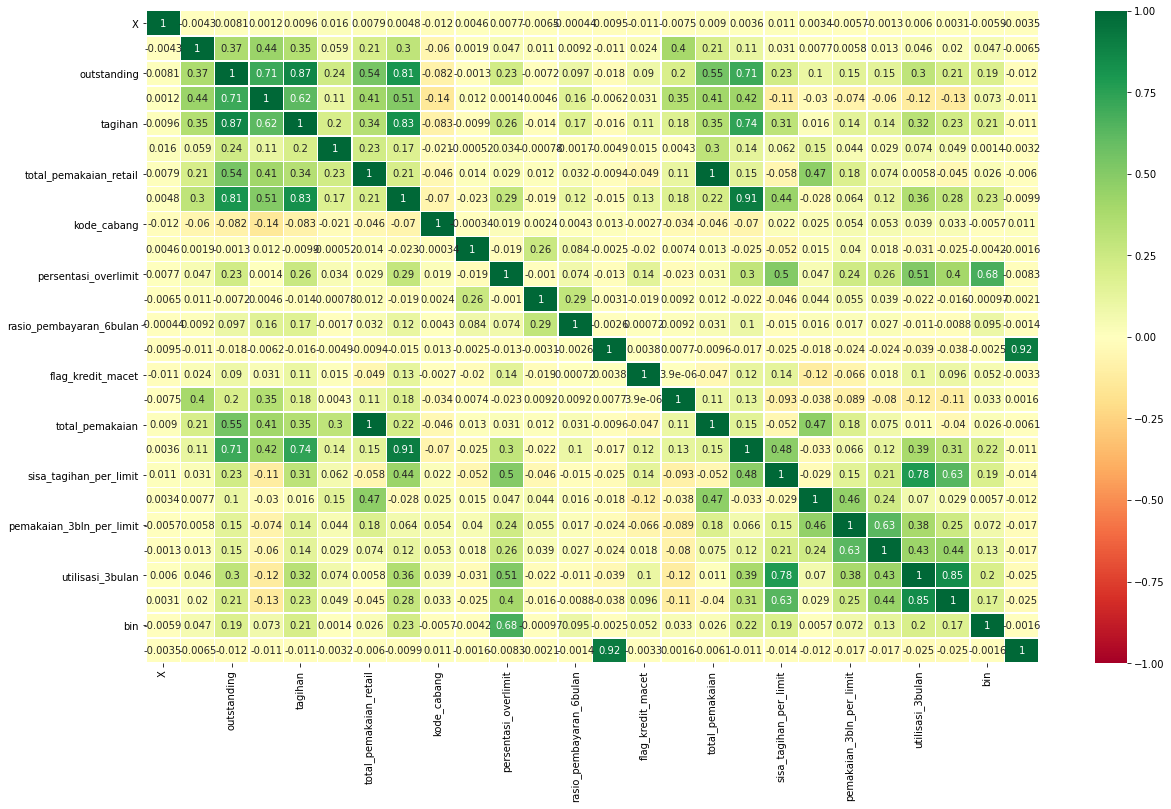

In [145]:
# Melakukan perhitungan nilai korelasi dengan mengasumsikan data adalah data interval.
sns.heatmap(dtrain.corr(),linewidths=.5,annot=True,cmap='RdYlGn', vmin=-1, vmax=1)
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

In [146]:
# Cek Urutan korelasi terendah ke tertinggi
korelasi = dtrain.corr()["flag_kredit_macet"].sort_values()
korelasi

total_pemakaian_per_limit             -0.116349
pemakaian_3bln_per_limit              -0.066432
total_pemakaian_retail                -0.048911
total_pemakaian                       -0.046733
rasio_pembayaran                      -0.020330
rasio_pembayaran_3bulan               -0.018774
X                                     -0.011476
bin_delikuensi                        -0.003334
kode_cabang                           -0.002734
jumlah_tahun_sejak_pembukaan_kredit    0.000004
rasio_pembayaran_6bulan                0.000723
skor_delikuensi                        0.003825
total_pemakaian_tunai                  0.015235
pemakaian_6bln_per_limit               0.018276
jumlah_kartu                           0.023895
limit_kredit                           0.031490
bin                                    0.052259
outstanding                            0.089548
utilisasi_6bulan                       0.095746
utilisasi_3bulan                       0.102866
tagihan                                0

> Dari hasil heatmap di atas didapatkan bahwa feature "total pemakaian retail" & "total pemakaian" memiliki korelasi yang sangat positif & kuat (bernilai 1).

#### FEATURE ENGINEERING

**FEATURE ENGINEERING**

In [147]:
# menambah feature 'rasio_tagihan_sisa_tagihan_tak_terbayar' untuk melihat sisa tagihan tak terbayar pada bulan terakhir per jumlah tagihan bulan akhir dari nasabah
dtrain['rasio_tagihan_sisa_tagihan_tak_terbayar'] = dtrain['sisa_tagihan_tidak_terbayar']/dtrain['tagihan']

# menambah feature 'utilisasi_3bulan_per_limit' untuk melihat utilisasi 3 bulan terakhir per jumlah limit kredit yang dimiliki nasabah
dtrain['utilisasi_3bulan_per_limit'] = dtrain['utilisasi_3bulan']/dtrain['limit_kredit']

# menambah feature 'utilisasi_6bulan_per_limit' untuk melihat utilisasi 3 bulan sebelum 3 bulan terakhir per jumlah limit kredit yang dimiliki nasabah
dtrain['utilisasi_6bulan_per_limit'] = dtrain['utilisasi_6bulan']/dtrain['limit_kredit']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

**SCALING**

In [148]:
dtrain.head()

,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan,bin,bin_delikuensi,rasio_tagihan_sisa_tagihan_tak_terbayar,utilisasi_3bulan_per_limit,utilisasi_6bulan_per_limit
100,13625,2,4306728,4000000.0,4316980.0,0.0,161999.0,4290920.0,0,7.98,6.87,4.39,9.96,0,0,6.83,161999.0,2145460.0,1.0700,0.04050,0.06300,0.11900,0.95200,0.83300,0,0,0.993963,2.380000e-07,2.082500e-07
101,3563,2,921499,59000000.0,563269.0,0.0,382810.0,893878.0,2,100.00,0.00,78.10,0.00,0,0,9.58,382810.0,446939.0,0.0152,0.00649,0.00747,0.02140,0.00906,0.02080,0,0,1.586947,1.535593e-10,3.525424e-10
102,12481,2,2986142,10000000.0,54771.0,0.0,2783345.0,0.0,0,0.00,0.00,38.70,64.90,0,0,5.92,2783345.0,0.0,0.0000,0.27800,0.07620,0.00737,0.07810,0.00853,0,0,0.000000,7.810000e-09,8.530000e-10
103,4254,2,6437645,6000000.0,5970411.0,0.0,866750.0,6424640.0,0,34.10,6.79,24.90,41.70,0,0,8.83,866750.0,3212320.0,1.0700,0.14400,0.15300,0.39300,1.13000,0.98300,0,0,1.076080,1.883333e-07,1.638333e-07
104,12541,3,1370140,7000000.0,278500.0,0.0,390074.0,821072.0,5,105.00,0.00,99.80,99.50,0,0,11.80,390074.0,273691.0,0.1170,0.05570,0.27700,0.37700,0.27100,0.44600,0,0,2.948194,3.871429e-08,6.371429e-08


In [149]:
dtrain.describe()

,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan,bin,bin_delikuensi,rasio_tagihan_sisa_tagihan_tak_terbayar,utilisasi_3bulan_per_limit,utilisasi_6bulan_per_limit
count,15243.000000,15243.000000,1.524300e+04,1.524300e+04,1.524300e+04,1.524300e+04,1.524300e+04,1.524300e+04,15243.000000,15243.000000,15243.000000,15243.000000,15243.000000,15243.000000,15243.000000,15243.000000,1.524300e+04,1.524300e+04,15243.000000,15243.000000,15243.000000,15243.000000,15243.000000,15243.000000,15243.000000,15243.000000,15243.000000,1.524300e+04,1.524300e+04
mean,7746.216952,2.507446,1.160716e+07,2.077908e+07,8.097279e+06,7.449573e+04,2.037738e+06,8.146400e+06,2.132520,67.547946,3.355427,80.862504,100.918574,0.004592,0.087844,6.641929,2.112311e+06,2.965263e+06,0.468735,0.110225,0.167668,0.203438,0.571827,0.534449,0.004723,0.001246,1.266691,8.528490e-08,8.036585e-08
std,4474.179993,1.013875,2.419846e+07,2.960812e+07,1.770636e+07,6.207148e+05,7.961983e+06,1.929042e+07,3.004418,782.900621,9.275493,802.092762,991.163091,0.112141,0.283077,4.690106,8.128677e+06,6.267090e+06,0.473290,0.200455,0.192356,0.275151,0.412530,0.432970,0.078389,0.046514,3.910308,1.006076e-07,1.022573e-07
min,1.000000,1.000000,0.000000e+00,3.000000e+06,2.004300e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000288,0.000000,0.000000,0.000000,0.000000,2.716667e-12,0.000000e+00
25%,3867.500000,2.000000,2.000551e+06,5.000000e+06,8.148450e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,20.800000,22.400000,0.000000,0.000000,2.920000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.035300,0.033219,0.189000,0.155000,0.000000,0.000000,0.000000,1.014492e-08,7.939616e-09
50%,7746.000000,2.000000,4.725195e+06,9.000000e+06,3.145469e+06,0.000000e+00,2.080000e+05,2.753848e+06,0.000000,27.000000,0.000000,50.100000,66.300000,0.000000,0.000000,5.666667,2.550000e+05,1.213084e+06,0.337000,0.022900,0.108000,0.118000,0.577000,0.498000,0.000000,0.000000,1.000000,4.620000e-08,4.023778e-08
75%,11623.500000,3.000000,1.057580e+07,2.200000e+07,7.420343e+06,0.000000e+00,1.432000e+06,7.142066e+06,5.000000,100.000000,1.090000,91.200000,100.000000,0.000000,0.000000,9.330000,1.533900e+06,3.082346e+06,0.930000,0.128000,0.239299,0.285000,0.918000,0.864000,0.000000,0.000000,1.146158,1.313756e-07,1.200000e-07
max,15493.000000,16.000000,7.980586e+08,1.000000e+09,6.280000e+08,2.884057e+07,2.850000e+08,4.440000e+08,10.000000,68983.000000,190.000000,75575.000000,54899.000000,5.000000,1.000000,34.416667,3.140000e+08,1.480000e+08,7.240000,4.600000,3.490000,8.110000,8.125671,9.730000,2.000000,2.000000,186.894015,2.480000e-06,2.345000e-06


In [150]:
# melakukan scaling untuk menghindari perbedaan range nilai yang tinggi diantara beberapa variabel.
transformation_svm = MinMaxScaler().fit(dtrain[['X','jumlah_kartu','outstanding','limit_kredit','tagihan', 'total_pemakaian_tunai','total_pemakaian_retail', 'sisa_tagihan_tidak_terbayar', 'kode_cabang', 'rasio_pembayaran', 'persentasi_overlimit', 'rasio_pembayaran_3bulan', 'rasio_pembayaran_6bulan', 'skor_delikuensi', 'jumlah_tahun_sejak_pembukaan_kredit', 'total_pemakaian', 'sisa_tagihan_per_jumlah_kartu', 'sisa_tagihan_per_limit', 'total_pemakaian_per_limit', 'pemakaian_3bln_per_limit', 'pemakaian_6bln_per_limit', 'utilisasi_3bulan', 'utilisasi_6bulan', 'bin', 'bin_delikuensi', 'rasio_tagihan_sisa_tagihan_tak_terbayar', 'utilisasi_3bulan_per_limit', 'utilisasi_6bulan_per_limit']])
dtrain[['X','jumlah_kartu','outstanding','limit_kredit','tagihan', 'total_pemakaian_tunai','total_pemakaian_retail', 'sisa_tagihan_tidak_terbayar', 'kode_cabang', 'rasio_pembayaran', 'persentasi_overlimit', 'rasio_pembayaran_3bulan', 'rasio_pembayaran_6bulan', 'skor_delikuensi', 'jumlah_tahun_sejak_pembukaan_kredit', 'total_pemakaian', 'sisa_tagihan_per_jumlah_kartu', 'sisa_tagihan_per_limit', 'total_pemakaian_per_limit', 'pemakaian_3bln_per_limit', 'pemakaian_6bln_per_limit', 'utilisasi_3bulan', 'utilisasi_6bulan', 'bin', 'bin_delikuensi', 'rasio_tagihan_sisa_tagihan_tak_terbayar', 'utilisasi_3bulan_per_limit', 'utilisasi_6bulan_per_limit']]=transformation_svm.transform(dtrain[['X','jumlah_kartu','outstanding','limit_kredit','tagihan', 'total_pemakaian_tunai','total_pemakaian_retail', 'sisa_tagihan_tidak_terbayar', 'kode_cabang', 'rasio_pembayaran', 'persentasi_overlimit', 'rasio_pembayaran_3bulan', 'rasio_pembayaran_6bulan', 'skor_delikuensi', 'jumlah_tahun_sejak_pembukaan_kredit', 'total_pemakaian', 'sisa_tagihan_per_jumlah_kartu', 'sisa_tagihan_per_limit', 'total_pemakaian_per_limit', 'pemakaian_3bln_per_limit', 'pemakaian_6bln_per_limit', 'utilisasi_3bulan', 'utilisasi_6bulan', 'bin', 'bin_delikuensi', 'rasio_tagihan_sisa_tagihan_tak_terbayar', 'utilisasi_3bulan_per_limit', 'utilisasi_6bulan_per_limit']])

dtrain

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan,bin,bin_delikuensi,rasio_tagihan_sisa_tagihan_tak_terbayar,utilisasi_3bulan_per_limit,utilisasi_6bulan_per_limit
100,0.879422,0.066667,0.005397,0.001003,0.006842,0.0,0.000568,0.009664,0.0,0.000116,0.036158,0.000058,0.000181,0.0,0,0.180594,0.000516,0.014496,0.147790,0.008804,0.018052,0.014673,0.117128,0.085612,0.0,0.0,0.005318,0.095967,0.088806
101,0.229925,0.066667,0.001155,0.056169,0.000865,0.0,0.001343,0.002013,0.2,0.001450,0.000000,0.001033,0.000000,0.0,0,0.262277,0.001219,0.003020,0.002099,0.001411,0.002140,0.002639,0.001080,0.002138,0.0,0.0,0.008491,0.000061,0.000150
102,0.805577,0.066667,0.003742,0.007021,0.000055,0.0,0.009766,0.000000,0.0,0.000000,0.000000,0.000512,0.001182,0.0,0,0.153564,0.008864,0.000000,0.000000,0.060435,0.021834,0.000909,0.009576,0.000877,0.0,0.0,0.000000,0.003148,0.000364
103,0.274529,0.066667,0.008067,0.003009,0.009475,0.0,0.003041,0.014470,0.0,0.000494,0.035737,0.000329,0.000760,0.0,0,0.240000,0.002760,0.021705,0.147790,0.031304,0.043840,0.048459,0.139035,0.101028,0.0,0.0,0.005758,0.075940,0.069865
104,0.809450,0.133333,0.001717,0.004012,0.000412,0.0,0.001369,0.001849,0.5,0.001522,0.000000,0.001321,0.001812,0.0,0,0.328218,0.001242,0.001849,0.016160,0.012109,0.079370,0.046486,0.033317,0.045838,0.0,0.0,0.015775,0.015610,0.027170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15338,0.286729,0.066667,0.014498,0.012036,0.004358,0.0,0.030513,0.009091,0.0,0.001225,0.000000,0.001076,0.001128,0.0,0,0.136040,0.027695,0.013637,0.037155,0.126087,0.083095,0.033169,0.041316,0.033916,0.0,0.0,0.007835,0.009031,0.009382
15339,0.424154,0.133333,0.016204,0.008024,0.018755,0.0,0.000033,0.027627,0.5,0.000000,0.095263,0.000290,0.000603,0.0,0,0.235248,0.000030,0.027627,0.154696,0.000188,0.040401,0.010999,0.132881,0.081706,0.0,0.0,0.005563,0.039588,0.030820
15340,0.568810,0.066667,0.005944,0.004012,0.008996,0.0,0.000981,0.010241,0.0,0.000116,0.000000,0.000126,0.000306,0.0,0,0.252475,0.000890,0.015361,0.089779,0.008674,0.013009,0.005462,0.088945,0.065468,0.0,0.0,0.004291,0.041646,0.038806
15341,0.028725,0.066667,0.003189,0.000000,0.003911,0.0,0.000000,0.005626,0.1,0.000334,0.000000,0.000101,0.000172,0.0,0,0.027228,0.000000,0.008439,0.115002,0.000000,0.005969,0.007535,0.111878,0.099256,0.0,0.0,0.005398,0.122222,0.137279


**MEMILIH-MEMILAH FEATURE YANG DIGUNAKAN**

In [151]:
# mendrop beberapa feature agar proses pembuatan model machine learning lebih optimal
dtrain = dtrain.drop(columns=['X', 'kode_cabang', 'jumlah_tahun_sejak_pembukaan_kredit', 'outstanding', 'utilisasi_3bulan', 'utilisasi_6bulan', 'total_pemakaian_tunai'])

dtrain

,jumlah_kartu,limit_kredit,tagihan,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,flag_kredit_macet,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,bin,bin_delikuensi,rasio_tagihan_sisa_tagihan_tak_terbayar,utilisasi_3bulan_per_limit,utilisasi_6bulan_per_limit
100,0.066667,0.001003,0.006842,0.000568,0.009664,0.000116,0.036158,0.000058,0.000181,0.0,0,0.000516,0.014496,0.147790,0.008804,0.018052,0.014673,0.0,0.0,0.005318,0.095967,0.088806
101,0.066667,0.056169,0.000865,0.001343,0.002013,0.001450,0.000000,0.001033,0.000000,0.0,0,0.001219,0.003020,0.002099,0.001411,0.002140,0.002639,0.0,0.0,0.008491,0.000061,0.000150
102,0.066667,0.007021,0.000055,0.009766,0.000000,0.000000,0.000000,0.000512,0.001182,0.0,0,0.008864,0.000000,0.000000,0.060435,0.021834,0.000909,0.0,0.0,0.000000,0.003148,0.000364
103,0.066667,0.003009,0.009475,0.003041,0.014470,0.000494,0.035737,0.000329,0.000760,0.0,0,0.002760,0.021705,0.147790,0.031304,0.043840,0.048459,0.0,0.0,0.005758,0.075940,0.069865
104,0.133333,0.004012,0.000412,0.001369,0.001849,0.001522,0.000000,0.001321,0.001812,0.0,0,0.001242,0.001849,0.016160,0.012109,0.079370,0.046486,0.0,0.0,0.015775,0.015610,0.027170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15338,0.066667,0.012036,0.004358,0.030513,0.009091,0.001225,0.000000,0.001076,0.001128,0.0,0,0.027695,0.013637,0.037155,0.126087,0.083095,0.033169,0.0,0.0,0.007835,0.009031,0.009382
15339,0.133333,0.008024,0.018755,0.000033,0.027627,0.000000,0.095263,0.000290,0.000603,0.0,0,0.000030,0.027627,0.154696,0.000188,0.040401,0.010999,0.0,0.0,0.005563,0.039588,0.030820
15340,0.066667,0.004012,0.008996,0.000981,0.010241,0.000116,0.000000,0.000126,0.000306,0.0,0,0.000890,0.015361,0.089779,0.008674,0.013009,0.005462,0.0,0.0,0.004291,0.041646,0.038806
15341,0.066667,0.000000,0.003911,0.000000,0.005626,0.000334,0.000000,0.000101,0.000172,0.0,0,0.000000,0.008439,0.115002,0.000000,0.005969,0.007535,0.0,0.0,0.005398,0.122222,0.137279


#### MODELING
Akan diterapkan & dibandingkan dua metode yang berbeda dalam pembuatan model machine learning classification, yakni metode statsmodel & sci-kit learn yang keduanya sama-sama menggunakan Logistic Regression untuk membangun model machine learning. Serta, akan dicari apakah ada perbedaan hasil dari kedua metode tersebut?

**Membagi Train Test Data**

In [152]:
# membagi data menjadi data train & data test untuk membuat model machine learning
X = dtrain.drop('flag_kredit_macet', axis=1)
y = dtrain['flag_kredit_macet']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X Train : ", len(X_train))
print("y Train : ", len(y_train))
print("X Test : ", len(X_test))
print("t Test : ", len(y_test))

X Train :  10670
y Train :  10670
X Test :  4573
t Test :  4573


**STATS MODEL (LOGISTIC REGRESSION)**

In [153]:
Input = sm.add_constant(X_train)

In [154]:
# membuat model dengan data train yang telah di split
model = sm.Logit(y_train, X_train, missing='drop')
result = model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.265466
         Iterations 13
                                         Results: Logit
Model:                         Logit                      Pseudo R-squared:          0.112      
Dependent Variable:            flag_kredit_macet          AIC:                       5707.0528  
Date:                          2021-08-31 04:46           BIC:                       5859.8318  
No. Observations:              10670                      Log-Likelihood:            -2832.5    
Df Model:                      20                         LL-Null:                   -3190.2    
Df Residuals:                  10649                      LLR p-value:               1.2338e-138
Converged:                     1.0000                     Scale:                     1.0000     
No. Iterations:                13.0000                                                          
-----------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [155]:
# odds ratio
round(np.exp(result.params), 3)

jumlah_kartu                               1.000000e-03
limit_kredit                               3.291000e+00
tagihan                                    1.560000e-01
total_pemakaian_retail                     0.000000e+00
sisa_tagihan_tidak_terbayar                5.098409e+07
rasio_pembayaran                           0.000000e+00
persentasi_overlimit                       7.257567e+04
rasio_pembayaran_3bulan                    0.000000e+00
rasio_pembayaran_6bulan                    9.400000e-02
skor_delikuensi                            2.967000e+00
total_pemakaian                            2.336653e+23
sisa_tagihan_per_jumlah_kartu              0.000000e+00
sisa_tagihan_per_limit                     1.500000e-02
total_pemakaian_per_limit                  0.000000e+00
pemakaian_3bln_per_limit                   1.620000e-01
pemakaian_6bln_per_limit                   1.097427e+03
bin                                        4.000000e-03
bin_delikuensi                             6.300

In [156]:
# membuat variabel prediction yang berisikan prediksi terhadap data
prediction = result.predict(X_test)

In [157]:
# membandingkan hasil prediksi & aktual
pred_results = pd.DataFrame(prediction, columns = ["logreg_pred"])
pred_results["prediksi"] = pred_results['logreg_pred'].apply(lambda x: 1 if x > 0.5 else 0)
pred_results['actual'] = y_test
pred_results.head()

,logreg_pred,prediksi,actual
4193,0.133569,0,0
10865,0.043745,0,0
10475,0.001053,0,0
3874,0.049764,0,0
8879,0.392849,0,0


In [158]:
print('Test accuracy =  {:.3f}'.format(accuracy_score(pred_results['actual'], pred_results["prediksi"])))
print('Test precision =  {:.3f}'.format(precision_score(pred_results['actual'], pred_results["prediksi"], average='binary')))
print('Test recall =  {:.3f}'.format(recall_score(pred_results['actual'], pred_results["prediksi"], average='binary')))
print('Test f-score =  {:.3f}'.format(f1_score(pred_results['actual'], pred_results["prediksi"], average='binary')))

Test accuracy =  0.913
Test precision =  0.458
Test recall =  0.028
Test f-score =  0.053


**SCIKIT LEARN (LOGISTIC REGRESSION)**

In [159]:
# membuat model menggunakan library / tools logistic regression dari sci-kit learn
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [160]:
# menambahkan kolom variabel/feature baru untuk membandingkan secara side-to-side antara flag kredit macet (aktual) dengan prediksi dari model
y_pred = LR.predict(X_test)
logreg_test = pd.merge(X_test, y_test, left_index=True, right_index=True, how='outer')
logreg_test['prediction'] = y_pred
logreg_test.head()


,jumlah_kartu,limit_kredit,tagihan,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,bin,bin_delikuensi,rasio_tagihan_sisa_tagihan_tak_terbayar,utilisasi_3bulan_per_limit,utilisasi_6bulan_per_limit,flag_kredit_macet,prediction
4193,0.066667,0.003009,0.010806,0.000000,0.01183,0.000183,0.000000,0.000175,0.000217,0.0,0.000000,0.017746,0.120856,0.000000,0.017937,0.014057,0.0,0.0,0.004129,0.066666,0.060839,0,0
10865,0.066667,0.004012,0.002441,0.000000,0.00000,0.001493,0.000000,0.000992,0.001297,0.0,0.000000,0.000000,0.000000,0.000000,0.077364,0.081504,0.0,0.0,0.000000,0.040494,0.071276,0,0
10475,0.066667,0.002006,0.003015,0.005426,0.00000,0.002957,0.042368,0.001654,0.001822,0.0,0.004925,0.000000,0.000000,0.067174,0.134097,0.041554,0.0,0.0,0.000000,0.075644,0.063028,0,0
3874,0.066667,0.002006,0.000419,0.000000,0.00000,0.001508,0.000000,0.000662,0.000328,0.0,0.000000,0.000000,0.000000,0.000000,0.004585,0.001776,0.0,0.0,0.000000,0.011370,0.024648,0,0
8879,0.066667,0.007021,0.000373,0.000004,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000003,0.000000,0.000000,0.000022,0.000000,0.000000,0.0,0.0,0.000000,0.000170,0.000013,0,0


In [161]:
print('Accuracy of logistic regression classifier train data: {:.3f}'.format(LR.score(X_train, y_train)))
print('Accuracy of logistic regression classifier test data: {:.3f}'.format(LR.score(X_test, y_test)))

Accuracy of logistic regression classifier train data: 0.912
Accuracy of logistic regression classifier test data: 0.914


>Ternyata berdasarkan kedua metode di atas, Stats model & Sklearn dengan Logistic Regression, tidak ditemukan adanya perbedaan yang signifikan pada hasil nilai akurasi & keduanya sama-sama menghasilkan nilai akurasi yang kurang lebih sama yakni 91,2% - 91,4%.

#### EVALUATION

**Cross-Validation**


Membantu memeriksa performa rata-rata dari model yang telah dibuat berdasarkan data yang ada

In [162]:
# Memilih k-fold (dipilih k = 5)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [163]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
scores = cross_val_score(logreg, X_train, y_train, cv=kfold)
print("Cross-validation scores: {:.3f}".format(scores.mean()))

Cross-validation scores: 0.912


**Grid Search**

Membantu mengevaluasi model dengan melakukan tuning hyperparameter pada model machine learning yang telah dibuat

In [164]:
param_grid_lr = { 'C': [0.001, 0.01, 0.1, 1, 10, 100],
                 'class_weight':['balanced', None]}

grid_search_lr = GridSearchCV(logreg, param_grid_lr, cv=kfold)
grid_search_lr.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_lr.best_params_))
print("Best cross-validation score: {:.3}".format(grid_search_lr.best_score_))

Best parameters: {'C': 1, 'class_weight': None}
Best cross-validation score: 0.912


**Evaluation Metrics**

Membantu mendapatkan nilai accuracy, precision, recall, & f-score untuk dapat mengevaluasi model machine learning berdasarkan 4 metriks (True Positive, False Positive, False Negative, True Negative)

In [165]:
scoring = {'acc': 'accuracy',
           'F1': 'f1',
           'prec': 'precision',
           'recall':'recall'}
 
acc = []
f1 = []
prec = []
recall = []
 
logreg = LogisticRegression(C = 1)
scores = cross_validate(logreg, X, y, cv=kfold, scoring=scoring)
 
acc.append(scores['test_acc'].mean())
f1.append(scores['test_F1'].mean())
prec.append(scores['test_prec'].mean())
recall.append(scores['test_recall'].mean())
 
 
print("Accuracy scores: ", acc)
print("f1 scores: ", f1)
print("Precision scores: ", prec)
print("Recall scores: ", recall)

Accuracy scores:  [0.9124184685999197]
f1 scores:  [0.026169175805612104]
Precision scores:  [0.5609523809523809]
Recall scores:  [0.013402296248538911]


In [166]:
# Terapkan pada data test
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)
 
print("Accuracy score: ", accuracy_score(predictions, y_test))
print("Recall score: ", recall_score(predictions, y_test))


Accuracy score:  0.9140607916028866
Recall score:  0.625


### LOAD AND PREDICT NEW DATA

In [167]:
dtes = pd.read_csv(path + 'npl_credit_scoring_test.csv')
dtes

,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
0,6188,2,5025000,5000000.0,833333.0,900000.0,538002.0,3290742.0,F,100.0,0.00,100.0,150.0,0,6.75,1438002.0,1645371.0,0.65800,0.2880,0.03220,6.600000e-08,1.02000,1.200000
1,4783,2,509019,3000000.0,258000.0,0.0,418000.0,0.0,A,0.0,0.00,24.5,0.0,0,5.42,418000.0,0.0,0.00000,0.1390,0.06950,0.000000e+00,0.08970,0.059200
2,13414,2,5153766,5000000.0,5007495.0,0.0,5019950.0,5515204.0,F,0.0,9.88,75.2,10.0,0,7.67,5019950.0,2757602.0,1.10000,1.0000,0.43900,3.550000e-01,0.67400,0.363000
3,11819,3,29214412,35000000.0,28509908.0,0.0,4148000.0,29214022.0,A,0.0,0.00,15.0,30.2,0,13.70,4148000.0,9738007.0,0.83500,0.1190,0.08330,3.620000e-02,0.79200,0.743000
4,7416,2,40929,3000000.0,40100.0,0.0,0.0,0.0,B,0.0,0.00,0.0,0.0,0,6.42,0.0,0.0,0.00000,0.0000,0.00000,0.000000e+00,0.01070,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,6135,2,4308502,15000000.0,1320926.0,0.0,0.0,0.0,A,106.0,0.00,100.0,101.0,0,5.25,0.0,0.0,0.00000,0.0000,0.02770,9.020000e-02,0.42000,0.585000
146,14707,2,49859,17000000.0,45100.0,0.0,0.0,21989.0,A,0.0,0.00,72.7,144.0,0,8.83,0.0,10994.0,0.00129,0.0000,0.00326,4.410000e-03,0.00178,0.000541
147,7313,2,4692329,4000000.0,4691569.0,0.0,113200.0,4699929.0,H,0.0,18.60,42.2,48.7,0,4.25,113200.0,2349965.0,1.17000,0.0283,0.30700,3.230000e-01,0.66400,0.228000
148,13729,2,462814,3000000.0,215238.0,0.0,224840.0,493348.0,H,100.0,0.00,75.0,100.0,0,5.83,224840.0,246674.0,0.16400,0.0749,0.06670,2.330000e-02,0.10900,0.033800


In [168]:
dtes.describe()

,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
count,150.000000,150.000000,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,1.500000e+02,1.500000e+02,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,7425.926667,2.426667,1.077944e+07,1.956667e+07,7.164982e+06,5.900000e+04,1.365373e+06,8.403871e+06,81.512800,2.971667,49.597933,119.967733,0.006667,6.432200,1.424373e+06,3.317756e+06,0.459443,0.087215,0.161383,0.173214,0.544561,0.496405
std,4436.819080,0.797199,1.560297e+07,2.380272e+07,1.048165e+07,3.268761e+05,3.262666e+06,1.546054e+07,343.005366,7.508772,81.224174,824.508422,0.081650,3.918161,3.257153e+06,6.216436e+06,0.457270,0.139763,0.195670,0.183953,0.371804,0.380026
min,180.000000,2.000000,2.312000e+04,3.000000e+06,2.300000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,-821.550000,-1116.350000,0.000000,0.750000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.001290,0.000000
25%,3708.250000,2.000000,2.257512e+06,5.000000e+06,1.138527e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,24.100000,21.170000,0.000000,3.330000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.044226,0.032300,0.197961,0.169000
50%,7384.000000,2.000000,5.038225e+06,9.000000e+06,3.462150e+06,0.000000e+00,1.758790e+05,2.899340e+06,40.450000,0.000000,50.000000,63.150000,0.000000,5.500000,2.474190e+05,1.209952e+06,0.291500,0.024900,0.103150,0.109000,0.504500,0.428000
75%,11177.500000,3.000000,1.267008e+07,2.000000e+07,7.161343e+06,0.000000e+00,1.080250e+06,8.133821e+06,100.000000,0.000000,95.477500,100.000000,0.000000,8.957500,1.416973e+06,3.595408e+06,0.914887,0.121250,0.212014,0.281750,0.916274,0.834750
max,15347.000000,6.000000,9.859690e+07,1.200000e+08,6.276755e+07,3.000000e+06,2.143566e+07,9.213385e+07,4198.850000,52.600000,204.000000,10066.000000,1.000000,19.100000,2.143566e+07,4.606692e+07,1.410000,1.000000,1.700000,0.955000,1.280000,1.440000


**MENYESUAIKAN JUMLAH FEATURE**

- Membuat bin berdasarkan persentase overlimit

In [169]:
# membuat & membagi bin untuk tiap nilai rendah, sedang, & tinggi dari persentase overlimit
bin1_dtes = np.linspace(dtes['persentasi_overlimit'].min(), dtes['persentasi_overlimit'].max(), 4)
label2 = ['rendah', 'sedang', 'tinggi']
print(bin1_dtes)

[ 0.         17.53333333 35.06666667 52.6       ]


In [170]:
# membuat kolom baru yang berisikan bin dari cut / pembagian nilai persentase overlimit
dtes['bin'] = pd.cut(dtes['persentasi_overlimit'], bins=bin1_dtes, labels=label2, include_lowest=True)


In [171]:
# memanggil bin & persentase overlimit
dtes[['bin', 'persentasi_overlimit']]


,bin,persentasi_overlimit
0,rendah,0.00
1,rendah,0.00
2,rendah,9.88
3,rendah,0.00
4,rendah,0.00
...,...,...
145,rendah,0.00
146,rendah,0.00
147,sedang,18.60
148,rendah,0.00


- Membuat bin berdasarkan skor delikuensi

In [172]:
# membuat & membagi bin untuk tiap nilai rendah, sedang, & tinggi dari skor delikuensi
bin2_dtes = np.linspace(dtes['skor_delikuensi'].min(), dtes['skor_delikuensi'].max(), 4)
print(bin2_dtes)


[0.         0.33333333 0.66666667 1.        ]


In [173]:
# membuat kolom baru yang berisikan bin dari cut / pembagian nilai skor delikuensi
dtes['bin_delikuensi'] = pd.cut(dtes['skor_delikuensi'], bins=bin2_dtes, labels=label2, include_lowest=True)


In [174]:
# memanggil bin & nilai skor delikuensi
dtes[['bin_delikuensi', 'skor_delikuensi']]

,bin_delikuensi,skor_delikuensi
0,rendah,0
1,rendah,0
2,rendah,0
3,rendah,0
4,rendah,0
...,...,...
145,rendah,0
146,rendah,0
147,rendah,0
148,rendah,0


**DATA PRE-PROCESSING**

- Cek Duplicate

In [175]:
# mengecek duplikasi data
dtes[dtes.duplicated(keep=False)]

,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan,bin,bin_delikuensi


- Cek Missing Value

In [176]:
# mengecek missing value pada tiap-tiap feature
dtes.isnull().sum()

X                                      0
jumlah_kartu                           0
outstanding                            0
limit_kredit                           0
tagihan                                0
total_pemakaian_tunai                  0
total_pemakaian_retail                 0
sisa_tagihan_tidak_terbayar            0
kode_cabang                            0
rasio_pembayaran                       0
persentasi_overlimit                   0
rasio_pembayaran_3bulan                0
rasio_pembayaran_6bulan                0
skor_delikuensi                        0
jumlah_tahun_sejak_pembukaan_kredit    0
total_pemakaian                        0
sisa_tagihan_per_jumlah_kartu          0
sisa_tagihan_per_limit                 0
total_pemakaian_per_limit              0
pemakaian_3bln_per_limit               0
pemakaian_6bln_per_limit               0
utilisasi_3bulan                       0
utilisasi_6bulan                       0
bin                                    0
bin_delikuensi  

- Label Encoder

In [177]:
# Mengubah data kategorikal kedalam bentuk numerik
cat2 = ['kode_cabang', 'bin', 'bin_delikuensi']

encoded_data = LabelEncoder()

for feature in cat2:
        if feature in dtes.columns.values:
            dtes[feature] = encoded_data.fit_transform(dtes[feature])

dtes.head()

,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan,bin,bin_delikuensi
0,6188,2,5025000,5000000.0,833333.0,900000.0,538002.0,3290742.0,5,100.0,0.00,100.0,150.0,0,6.75,1438002.0,1645371.0,0.658,0.288,0.0322,6.600000e-08,1.0200,1.2000,0,0
1,4783,2,509019,3000000.0,258000.0,0.0,418000.0,0.0,0,0.0,0.00,24.5,0.0,0,5.42,418000.0,0.0,0.000,0.139,0.0695,0.000000e+00,0.0897,0.0592,0,0
2,13414,2,5153766,5000000.0,5007495.0,0.0,5019950.0,5515204.0,5,0.0,9.88,75.2,10.0,0,7.67,5019950.0,2757602.0,1.100,1.000,0.4390,3.550000e-01,0.6740,0.3630,0,0
3,11819,3,29214412,35000000.0,28509908.0,0.0,4148000.0,29214022.0,0,0.0,0.00,15.0,30.2,0,13.70,4148000.0,9738007.0,0.835,0.119,0.0833,3.620000e-02,0.7920,0.7430,0,0
4,7416,2,40929,3000000.0,40100.0,0.0,0.0,0.0,1,0.0,0.00,0.0,0.0,0,6.42,0.0,0.0,0.000,0.000,0.0000,0.000000e+00,0.0107,0.0000,0,0


- Data wrangling - imputasi

In [178]:
# membuat kategori yang berisikan feature yang memiliki nilai minus
kategori2 = ['total_pemakaian_retail', 'rasio_pembayaran', 'rasio_pembayaran_3bulan', 'rasio_pembayaran_6bulan', 'total_pemakaian', 'total_pemakaian_per_limit', 'pemakaian_3bln_per_limit', 'pemakaian_6bln_per_limit']


In [179]:
# membuat looping yang mengisi nilai minus dalam variabel kategori dengan masing-masing mean pada tiap feature
for feature in kategori2:
            dtes[feature] = dtes[feature].apply(lambda x: dtes[feature].mean() if x < 0 else x)

In [180]:
dtes.describe()

,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan,bin,bin_delikuensi
count,150.000000,150.000000,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,1.500000e+02,1.500000e+02,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,7425.926667,2.426667,1.077944e+07,1.956667e+07,7.164982e+06,5.900000e+04,1.365373e+06,8.403871e+06,2.093333,81.512800,2.971667,55.405586,129.451636,0.006667,6.432200,1.424373e+06,3.317756e+06,0.459443,0.087215,0.161383,0.173214,0.544561,0.496405,0.073333,0.006667
std,4436.819080,0.797199,1.560297e+07,2.380272e+07,1.048165e+07,3.268761e+05,3.262666e+06,1.546054e+07,3.024168,343.005366,7.508772,38.342291,818.066298,0.081650,3.918161,3.257153e+06,6.216436e+06,0.457270,0.139763,0.195670,0.183953,0.371804,0.380026,0.286067,0.081650
min,180.000000,2.000000,2.312000e+04,3.000000e+06,2.300000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.001290,0.000000,0.000000,0.000000
25%,3708.250000,2.000000,2.257512e+06,5.000000e+06,1.138527e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,24.425000,24.515000,0.000000,3.330000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.044226,0.032300,0.197961,0.169000,0.000000,0.000000
50%,7384.000000,2.000000,5.038225e+06,9.000000e+06,3.462150e+06,0.000000e+00,1.758790e+05,2.899340e+06,0.000000,40.450000,0.000000,50.000000,65.450000,0.000000,5.500000,2.474190e+05,1.209952e+06,0.291500,0.024900,0.103150,0.109000,0.504500,0.428000,0.000000,0.000000
75%,11177.500000,3.000000,1.267008e+07,2.000000e+07,7.161343e+06,0.000000e+00,1.080250e+06,8.133821e+06,5.000000,100.000000,0.000000,95.477500,100.000000,0.000000,8.957500,1.416973e+06,3.595408e+06,0.914887,0.121250,0.212014,0.281750,0.916274,0.834750,0.000000,0.000000
max,15347.000000,6.000000,9.859690e+07,1.200000e+08,6.276755e+07,3.000000e+06,2.143566e+07,9.213385e+07,10.000000,4198.850000,52.600000,204.000000,10066.000000,1.000000,19.100000,2.143566e+07,4.606692e+07,1.410000,1.000000,1.700000,0.955000,1.280000,1.440000,2.000000,1.000000


**FEATURE ENGINEERING**

- Feature Engineering

In [181]:
# menambah feature 'rasio_tagihan_sisa_tagihan_tak_terbayar' untuk melihat sisa tagihan tak terbayar pada bulan terakhir per jumlah tagihan bulan akhir dari nasabah
dtes['rasio_tagihan_sisa_tagihan_tak_terbayar'] = dtes['sisa_tagihan_tidak_terbayar']/dtes['tagihan']

# menambah feature 'utilisasi_3bulan_per_limit' untuk melihat utilisasi 3 bulan terakhir per jumlah limit kredit yang dimiliki nasabah
dtes['utilisasi_3bulan_per_limit'] = dtes['utilisasi_3bulan']/dtes['limit_kredit']

# menambah feature 'utilisasi_6bulan_per_limit' untuk melihat utilisasi 3 bulan sebelum 3 bulan terakhir per jumlah limit kredit yang dimiliki nasabah
dtes['utilisasi_6bulan_per_limit'] = dtes['utilisasi_6bulan']/dtes['limit_kredit']

In [182]:
dtes

,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan,bin,bin_delikuensi,rasio_tagihan_sisa_tagihan_tak_terbayar,utilisasi_3bulan_per_limit,utilisasi_6bulan_per_limit
0,6188,2,5025000,5000000.0,833333.0,900000.0,538002.0,3290742.0,5,100.0,0.00,100.0,150.0,0,6.75,1438002.0,1645371.0,0.65800,0.2880,0.03220,6.600000e-08,1.02000,1.200000,0,0,3.948892,2.040000e-07,2.400000e-07
1,4783,2,509019,3000000.0,258000.0,0.0,418000.0,0.0,0,0.0,0.00,24.5,0.0,0,5.42,418000.0,0.0,0.00000,0.1390,0.06950,0.000000e+00,0.08970,0.059200,0,0,0.000000,2.990000e-08,1.973333e-08
2,13414,2,5153766,5000000.0,5007495.0,0.0,5019950.0,5515204.0,5,0.0,9.88,75.2,10.0,0,7.67,5019950.0,2757602.0,1.10000,1.0000,0.43900,3.550000e-01,0.67400,0.363000,0,0,1.101390,1.348000e-07,7.260000e-08
3,11819,3,29214412,35000000.0,28509908.0,0.0,4148000.0,29214022.0,0,0.0,0.00,15.0,30.2,0,13.70,4148000.0,9738007.0,0.83500,0.1190,0.08330,3.620000e-02,0.79200,0.743000,0,0,1.024697,2.262857e-08,2.122857e-08
4,7416,2,40929,3000000.0,40100.0,0.0,0.0,0.0,1,0.0,0.00,0.0,0.0,0,6.42,0.0,0.0,0.00000,0.0000,0.00000,0.000000e+00,0.01070,0.000000,0,0,0.000000,3.566667e-09,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,6135,2,4308502,15000000.0,1320926.0,0.0,0.0,0.0,0,106.0,0.00,100.0,101.0,0,5.25,0.0,0.0,0.00000,0.0000,0.02770,9.020000e-02,0.42000,0.585000,0,0,0.000000,2.800000e-08,3.900000e-08
146,14707,2,49859,17000000.0,45100.0,0.0,0.0,21989.0,0,0.0,0.00,72.7,144.0,0,8.83,0.0,10994.0,0.00129,0.0000,0.00326,4.410000e-03,0.00178,0.000541,0,0,0.487561,1.047059e-10,3.182353e-11
147,7313,2,4692329,4000000.0,4691569.0,0.0,113200.0,4699929.0,7,0.0,18.60,42.2,48.7,0,4.25,113200.0,2349965.0,1.17000,0.0283,0.30700,3.230000e-01,0.66400,0.228000,1,0,1.001782,1.660000e-07,5.700000e-08
148,13729,2,462814,3000000.0,215238.0,0.0,224840.0,493348.0,7,100.0,0.00,75.0,100.0,0,5.83,224840.0,246674.0,0.16400,0.0749,0.06670,2.330000e-02,0.10900,0.033800,0,0,2.292105,3.633333e-08,1.126667e-08


- Scaling

In [183]:
# melakukan scaling untuk menghindari perbedaan range nilai yang tinggi diantara beberapa variabel.
transformation_svm = MinMaxScaler().fit(dtes[['X','jumlah_kartu','outstanding','limit_kredit','tagihan', 'total_pemakaian_tunai','total_pemakaian_retail', 'sisa_tagihan_tidak_terbayar', 'kode_cabang', 'rasio_pembayaran', 'persentasi_overlimit', 'rasio_pembayaran_3bulan', 'rasio_pembayaran_6bulan', 'skor_delikuensi', 'jumlah_tahun_sejak_pembukaan_kredit', 'total_pemakaian', 'sisa_tagihan_per_jumlah_kartu', 'sisa_tagihan_per_limit', 'total_pemakaian_per_limit', 'pemakaian_3bln_per_limit', 'pemakaian_6bln_per_limit', 'utilisasi_3bulan', 'utilisasi_6bulan', 'bin', 'bin_delikuensi', 'rasio_tagihan_sisa_tagihan_tak_terbayar', 'utilisasi_3bulan_per_limit', 'utilisasi_6bulan_per_limit']])
dtes[['X','jumlah_kartu','outstanding','limit_kredit','tagihan', 'total_pemakaian_tunai','total_pemakaian_retail', 'sisa_tagihan_tidak_terbayar', 'kode_cabang', 'rasio_pembayaran', 'persentasi_overlimit', 'rasio_pembayaran_3bulan', 'rasio_pembayaran_6bulan', 'skor_delikuensi', 'jumlah_tahun_sejak_pembukaan_kredit', 'total_pemakaian', 'sisa_tagihan_per_jumlah_kartu', 'sisa_tagihan_per_limit', 'total_pemakaian_per_limit', 'pemakaian_3bln_per_limit', 'pemakaian_6bln_per_limit', 'utilisasi_3bulan', 'utilisasi_6bulan', 'bin', 'bin_delikuensi', 'rasio_tagihan_sisa_tagihan_tak_terbayar', 'utilisasi_3bulan_per_limit', 'utilisasi_6bulan_per_limit']]=transformation_svm.transform(dtes[['X','jumlah_kartu','outstanding','limit_kredit','tagihan', 'total_pemakaian_tunai','total_pemakaian_retail', 'sisa_tagihan_tidak_terbayar', 'kode_cabang', 'rasio_pembayaran', 'persentasi_overlimit', 'rasio_pembayaran_3bulan', 'rasio_pembayaran_6bulan', 'skor_delikuensi', 'jumlah_tahun_sejak_pembukaan_kredit', 'total_pemakaian', 'sisa_tagihan_per_jumlah_kartu', 'sisa_tagihan_per_limit', 'total_pemakaian_per_limit', 'pemakaian_3bln_per_limit', 'pemakaian_6bln_per_limit', 'utilisasi_3bulan', 'utilisasi_6bulan', 'bin', 'bin_delikuensi', 'rasio_tagihan_sisa_tagihan_tak_terbayar', 'utilisasi_3bulan_per_limit', 'utilisasi_6bulan_per_limit']])

dtes

,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan,bin,bin_delikuensi,rasio_tagihan_sisa_tagihan_tak_terbayar,utilisasi_3bulan_per_limit,utilisasi_6bulan_per_limit
0,0.396123,0.00,0.050742,0.017094,0.012915,0.3,0.025098,0.035717,0.5,0.023816,0.000000,0.490196,0.014902,0.0,0.326975,0.067085,0.035717,0.466667,0.2880,0.018941,6.910995e-08,0.796670,0.833333,0.0,0.0,0.286168,0.551231,0.648649
1,0.303488,0.00,0.004929,0.000000,0.003745,0.0,0.019500,0.000000,0.0,0.000000,0.000000,0.120098,0.000000,0.0,0.254496,0.019500,0.000000,0.000000,0.1390,0.040882,0.000000e+00,0.069140,0.041111,0.0,0.0,0.000000,0.080564,0.053333
2,0.872552,0.00,0.052049,0.017094,0.079441,0.0,0.234187,0.059861,0.5,0.000000,0.187833,0.368627,0.000993,0.0,0.377112,0.234187,0.059861,0.780142,1.0000,0.258235,3.717277e-01,0.526085,0.252083,0.0,0.0,0.079816,0.364154,0.196216
3,0.767390,0.25,0.296136,0.273504,0.454014,0.0,0.193509,0.317082,0.0,0.000000,0.000000,0.073529,0.003000,0.0,0.705722,0.193509,0.211388,0.592199,0.1190,0.049000,3.790576e-02,0.618365,0.515972,0.0,0.0,0.074258,0.060906,0.057375
4,0.477088,0.00,0.000181,0.000000,0.000273,0.0,0.000000,0.000000,0.1,0.000000,0.000000,0.000000,0.000000,0.0,0.308992,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000e+00,0.007359,0.000000,0.0,0.0,0.000000,0.009374,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.392629,0.00,0.043474,0.102564,0.020686,0.0,0.000000,0.000000,0.0,0.025245,0.000000,0.490196,0.010034,0.0,0.245232,0.000000,0.000000,0.000000,0.0000,0.016294,9.445026e-02,0.327447,0.406250,0.0,0.0,0.000000,0.075428,0.105405
146,0.957803,0.00,0.000271,0.119658,0.000352,0.0,0.000000,0.000239,0.0,0.000000,0.000000,0.356373,0.014306,0.0,0.440327,0.000000,0.000239,0.000915,0.0000,0.001918,4.617801e-03,0.000383,0.000376,0.0,0.0,0.035333,0.000015,0.000086
147,0.470297,0.00,0.047368,0.008547,0.074406,0.0,0.005281,0.051012,0.7,0.000000,0.353612,0.206863,0.004838,0.0,0.190736,0.005281,0.051012,0.829787,0.0283,0.180588,3.382199e-01,0.518265,0.158333,0.5,0.0,0.072597,0.448501,0.154054
148,0.893321,0.00,0.004461,0.000000,0.003064,0.0,0.010489,0.005355,0.7,0.023816,0.000000,0.367647,0.009934,0.0,0.276839,0.010489,0.005355,0.116312,0.0749,0.039235,2.439791e-02,0.084233,0.023472,0.0,0.0,0.166104,0.097956,0.030450


- Memilih-memilah Feature

In [184]:
# mendrop beberapa feature agar sesuai model
dtes = dtes.drop(columns=['X', 'kode_cabang', 'jumlah_tahun_sejak_pembukaan_kredit', 'outstanding', 'utilisasi_3bulan', 'utilisasi_6bulan', 'total_pemakaian_tunai'])

dtes

,jumlah_kartu,limit_kredit,tagihan,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,bin,bin_delikuensi,rasio_tagihan_sisa_tagihan_tak_terbayar,utilisasi_3bulan_per_limit,utilisasi_6bulan_per_limit
0,0.00,0.017094,0.012915,0.025098,0.035717,0.023816,0.000000,0.490196,0.014902,0.0,0.067085,0.035717,0.466667,0.2880,0.018941,6.910995e-08,0.0,0.0,0.286168,0.551231,0.648649
1,0.00,0.000000,0.003745,0.019500,0.000000,0.000000,0.000000,0.120098,0.000000,0.0,0.019500,0.000000,0.000000,0.1390,0.040882,0.000000e+00,0.0,0.0,0.000000,0.080564,0.053333
2,0.00,0.017094,0.079441,0.234187,0.059861,0.000000,0.187833,0.368627,0.000993,0.0,0.234187,0.059861,0.780142,1.0000,0.258235,3.717277e-01,0.0,0.0,0.079816,0.364154,0.196216
3,0.25,0.273504,0.454014,0.193509,0.317082,0.000000,0.000000,0.073529,0.003000,0.0,0.193509,0.211388,0.592199,0.1190,0.049000,3.790576e-02,0.0,0.0,0.074258,0.060906,0.057375
4,0.00,0.000000,0.000273,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000e+00,0.0,0.0,0.000000,0.009374,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.00,0.102564,0.020686,0.000000,0.000000,0.025245,0.000000,0.490196,0.010034,0.0,0.000000,0.000000,0.000000,0.0000,0.016294,9.445026e-02,0.0,0.0,0.000000,0.075428,0.105405
146,0.00,0.119658,0.000352,0.000000,0.000239,0.000000,0.000000,0.356373,0.014306,0.0,0.000000,0.000239,0.000915,0.0000,0.001918,4.617801e-03,0.0,0.0,0.035333,0.000015,0.000086
147,0.00,0.008547,0.074406,0.005281,0.051012,0.000000,0.353612,0.206863,0.004838,0.0,0.005281,0.051012,0.829787,0.0283,0.180588,3.382199e-01,0.5,0.0,0.072597,0.448501,0.154054
148,0.00,0.000000,0.003064,0.010489,0.005355,0.023816,0.000000,0.367647,0.009934,0.0,0.010489,0.005355,0.116312,0.0749,0.039235,2.439791e-02,0.0,0.0,0.166104,0.097956,0.030450


**PREDICT NEW DATA / VALUE**

In [185]:
# membuat feature untuk memprediksi value dari flag kredit macet
dtes_predict = LR.predict(dtes)
dtes['flag_kredit_macet_predict'] = dtes_predict
dtes.head()

,jumlah_kartu,limit_kredit,tagihan,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,bin,bin_delikuensi,rasio_tagihan_sisa_tagihan_tak_terbayar,utilisasi_3bulan_per_limit,utilisasi_6bulan_per_limit,flag_kredit_macet_predict
0,0.00,0.017094,0.012915,0.025098,0.035717,0.023816,0.000000,0.490196,0.014902,0.0,0.067085,0.035717,0.466667,0.288,0.018941,6.910995e-08,0.0,0.0,0.286168,0.551231,0.648649,0
1,0.00,0.000000,0.003745,0.019500,0.000000,0.000000,0.000000,0.120098,0.000000,0.0,0.019500,0.000000,0.000000,0.139,0.040882,0.000000e+00,0.0,0.0,0.000000,0.080564,0.053333,0
2,0.00,0.017094,0.079441,0.234187,0.059861,0.000000,0.187833,0.368627,0.000993,0.0,0.234187,0.059861,0.780142,1.000,0.258235,3.717277e-01,0.0,0.0,0.079816,0.364154,0.196216,0
3,0.25,0.273504,0.454014,0.193509,0.317082,0.000000,0.000000,0.073529,0.003000,0.0,0.193509,0.211388,0.592199,0.119,0.049000,3.790576e-02,0.0,0.0,0.074258,0.060906,0.057375,0
4,0.00,0.000000,0.000273,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000e+00,0.0,0.0,0.000000,0.009374,0.000000,0


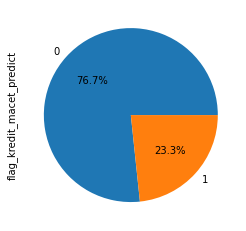

In [187]:
# melihat proporsi prediksi flag kredit macet
dtes['flag_kredit_macet_predict'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

>Didapatkan prediksi nilai flag kredit pada data tes berdasarkan model yang telah dibuat & tidak ditemukan error; lancar dalam membuat prediksi baru.

### KESIMPULAN/SARAN

**KESIMPULAN:**
1. **Insight dari data**
- Berdasarkan insight yang didapat pada tahapan EDA, didapatkan bahwa jumlah nasabah dengan status kredit macet jauh lebih sedikit (8,8%) dibandingkan dengan yang tidak (91,2%). Lalu, pada summary data yang didapatkan, telah ditemukan adanya anomali pada data yakni berupa nilai minus/negatif pada beberapa variabel/feature.
- Berdasarkan insight & summary dari data pula, dapat diasumsikan bahwasannya para nasabah cenderung lebih banyak menggunakan kartu kredit pada pemakaian retail dibandingan dengan pemakaian tunai. 
- Lalu, didapatkan pula nasabah yang tidak memiliki total pemakaian tunai & total pemakaian retail yakni sejumlah 5143 dari 15343 nasabah. Artinya sejumlah nasabah ini tidak melakukan pemakaian kredit, baik secara tunai / retail, pada bulan terakhir dari riwayat penggunaan kartu kredit nasabah.
- Berdasarkan persentase overlimit & skor delikuensi yang dimiliki nasabah, didapatkan lebih banyak nilai yang rendah pada masing-masing persentase overlimit & skor delikuensi di status flag kredit macet bernilai nol (0) atau tidak memiliki flag kredit macet. Sehingga persentase overlimit & skor delikuensi tidak begitu mempengaruhi nilai flag kredit macet.
- Lalu, berdasarkan distribusi masing-masing sisa tagihan (tidak terbayar, per jumlah kartu, & per limit) tidak didapatkan adanya pengaruh yang besar pula terhadap nilai flag kredit macet pada nasabah.
- Untuk insight yang didapatkan dari heatmap korelasi sendiri didapatkan 3 hubungan antar feature yang tertinggi yakni korelasi antara 'total_pemakaian_retail' dengan 'total_pemakaian', korelasi antara 'outstanding' dengan 'tagihan', & korelasi antara 'sisa_tagihan_tidak_terbayar' dengan 'sisa_tagihan_per_jumlah_kartu'.
- Untuk korelasi antara 'total_pemakaian_retail' dengan 'total_pemakaian' mendapatkan nilai 1 atau hubungannya bernilai positif. Maka antar dua variabel feature ini saling terikat & saling mempengaruhi; nilai total pemakaian retail sangat mempengaruhi nilai dari total pemakaian. Sehingga hal ini dapat membenarkan asumsi bahwa lebih banyak nasabah yang menggunakan kredit untuk pemakaian retail daripada tunai.
- Sedangkan untuk korelasi antara 'outstanding' dengan 'tagihan' memiliki hubungan positif dengan nilai  0,87. Oleh karena itu, berarti untuk setiap total saldo pemakaian kartu kredit yang digunakan nasabah bertambah, maka bertambah pula jumlah tagihan kredit yang dimiliki nasabah.
- Dan untuk korelasi antara 'sisa_tagihan_tidak_terbayar' dengan 'sisa_tagihan_per_jumlah_kartu' memiliki hubungan positif dengan nilai 0,91. Untuk hubungan ini dapat diasumsikan bahwa para nasabah yang memiliki kartu lebih dari satu / banyak, maka semakin banyak pula sisa tagihan yang tidak terbayar yang dimiliki oleh nasabah.

2. **Hasil model machine learning**
- Berdasarkan dua metode dari logistic linear (statsmodel & sci-kitlearn) didapatkan hasil akurasi dari model machine learning yang kurang lebih sama yakni 91,2% - 91,4%.
- Namun, setelah melalui evaluasi model menggunakan K-Fold, Grid Search, & Confussion metrics didapatkan hasil evaluasi model sebagai berikut:
> Accuracy: 0.912
>
> Precision: 0.560
>
> Recall: 0.013
>
> F-Score: 0.026 
- Berdasarkan hasil evaluasi model tersebut dapat disimpulkan bahwa secara keseluruhan model sudah dapat memprediksi dengan akurasi 91,2%. Namun, untuk memprediksi nilai positif yang benar secara keseluruhan di kelas positif (recall), model machine learning ini masih sangatlah buruk dengan persentase keberhasilan hanya sebesar 1,3%. Sedangkan, untuk memprediksi  banyaknya nilai yang benar diantara prediksi yang positif (precision), model machine learning ini sudah cukup lumayan dengan persentase keberhasilan 56%.
- Hasil model machine learning di atas dapat disimpulkan bahwa masih belum cukup baik & belum sepenuhnya dapat diterapkan. Karena masih adanya kecacatan model dalam memprediksi data. Diperlukan adanya analisis & pengerjaan lebih lanjut untuk mendapatkan hasil model machine learning yang lebih baik.
>

**SARAN:**
- Untuk dapat mengantisipasi kecacatan pada data yang akan dianalisa & dibuat model machine learning, bank dapat memperbaiki / membuat sistem penginputan & pengecekkan data yang lebih baik agar dapat menghasilkan data yang lebih baik pula.
- Untuk dapat dilakukan analisis lebih lanjut dapat menambahkan beberapa variabel feature lain seperti 'pendapatan nasabah', 'jumlah tanggungan nasabah', dsb.
- Untuk mendapatkan persebaran nilai yang merata pada 'total pemakaian retail' & 'total pemakaian tunai', bank bisa menawarkan promo kepada nasabah untuk setiap pemakaian kredit di kedua variabel feature tersebut. Namun, jika bank hanya ingin memfokuskan pendapatan nilai yang tinggi di salah satu variabel feature antara 'total pemakaian retail' & 'total pemakaian tunai', maka penawaran promo hanya dilakukan di setiap pemakaian kartu kredit di salah satu variabel feature tersebut.
- Untuk dapat mengatasi sisa tagihan tidak terbayar & sisa tagihan per jumlah kartu dari nasabah, bank bisa mengadakan pembuatan persyaratan / ketentuan terbaru terkait jumlah maksimum kartu kredit yang dapat dimiliki nasabah. 